In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# IDÉES ETAPES À SUIVRES :
1) Exploration et préparation des données:

- Analyser les données pour comprendre leur structure.
- Nettoyer les données (traiter les valeurs manquantes, les doublons, etc.).
- Effectuer une analyse exploratoire des données (EDA).

2) Prétraitement des données:

- Normaliser ou standardiser les données.
- Encoder les variables catégorielles.
- Diviser les données en ensembles d'entraînement et de test.

3) Sélection du modèle:

- Choisir les algorithmes de machine learning appropriés.
- Entraîner plusieurs modèles pour comparer leurs performances.

4) Entraînement du modèle:

- Entraîner les modèles sur l'ensemble d'entraînement.
- Ajuster les hyperparamètres pour optimiser les performances.

5) Évaluation du modèle:

- Évaluer les modèles sur l'ensemble de test.
- Utiliser des métriques de performance appropriées (précision, rappel, F1-score, etc.).


In [122]:
train_df = pd.read_csv('classification-multi-classes/train.csv', 
                      delimiter = ",",
                      header = 0)

train_df.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,0,1055.0,NaN,19724.0,F,NaN,NaN,NaN,N,1.3,NaN,3.64,NaN,NaN,NaN,NaN,209.0,10.5,3.0,C
1,1,3282.0,Placebo,17884.0,F,N,Y,Y,N,0.7,309.0,3.60,96.0,1142.0,71.3,106.0,240.0,12.4,4.0,C
2,2,1653.0,NaN,20600.0,F,NaN,NaN,NaN,N,2.2,NaN,3.64,NaN,NaN,NaN,NaN,139.0,9.5,2.0,C
3,3,999.0,D-penicillamine,22514.0,F,N,Y,N,N,1.0,498.0,3.35,89.0,1601.0,164.3,85.0,394.0,9.7,3.0,C
4,4,2202.0,NaN,17897.0,F,NaN,NaN,NaN,N,17.2,NaN,3.15,NaN,NaN,NaN,NaN,432.0,11.2,3.0,C


In [123]:
train_df.shape

(15000, 20)

## <span style="color:red">1.  Exploration et préparation des données</span>

- id : Identifiant unique de chaque patient ou enregistrement. 
- N_Days : Nombre de jours écoulés depuis un événement de référence (par exemple, diagnostic, début du suivi, ou début du traitement). Début du traitement 1986.
- Drug : Nom ou catégorie du médicament administré au patient.
- Age : Âge du patient (probablement en années).
- Sex : Sexe du patient (Male ou Female).
- Ascites : Présence d’ascite (accumulation de liquide dans la cavité abdominale). Valeurs possibles : Yes, No, ou NA (inconnue).
- Hepatomegaly : Présence d’hépatomégalie (augmentation du volume du foie). Valeurs possibles : Yes, No, ou NA.
- Spiders : Présence de telangiectasies en araignée (lésions vasculaires cutanées). Valeurs possibles : Yes, No, ou NA.
- Edema : Présence d’œdème. Peut inclure des catégories comme None, Slight, ou Marked.
- Bilirubin : Niveau de bilirubine dans le sang (en mg/dL), un marqueur de la fonction hépatique.
- Cholesterol : Niveau de cholestérol dans le sang (en mg/dL), souvent indicatif d’une santé globale ou de troubles métaboliques.
- Albumin : Niveau d’albumine dans le sang (en g/dL), un marqueur nutritionnel et de la fonction hépatique.
- Copper : Concentration de cuivre dans le sang ou l’urine (en µg/dL), indicateur d’une éventuelle maladie de Wilson ou autre désordre métabolique.
- Alk_Phos : Niveau de phosphatases alcalines (en UI/L), un indicateur de fonction hépatique ou osseuse.
- SGOT : Niveau d'enzymes transaminases (SGOT ou AST) (en UI/L), indicateur de dommages au foie ou à d’autres organes.
- Tryglicerides : Niveau de triglycérides dans le sang (en mg/dL), un marqueur lipidique et métabolique.
- Platelets : Nombre de plaquettes dans le sang (en milliers/μL), un indicateur de la coagulation.
- Prothrombin : Temps de prothrombine (en secondes ou % d’activité), un test de coagulation pour évaluer la fonction hépatique.
- Stage : Stade de la maladie, basé sur un système de classification (souvent de 1 à 4, où 4 est le plus sévère).
- Status : État ou issue du patient. Par exemple : Alive, Deceased, ou autres catégories. (VARIABLE CYBLE)

### <span style="color:blue">Types des variables</span>

In [124]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             15000 non-null  int64  
 1   N_Days         15000 non-null  float64
 2   Drug           8564 non-null   object 
 3   Age            15000 non-null  float64
 4   Sex            15000 non-null  object 
 5   Ascites        8563 non-null   object 
 6   Hepatomegaly   8564 non-null   object 
 7   Spiders        8555 non-null   object 
 8   Edema          15000 non-null  object 
 9   Bilirubin      15000 non-null  float64
 10  Cholesterol    6669 non-null   float64
 11  Albumin        15000 non-null  float64
 12  Copper         8452 non-null   float64
 13  Alk_Phos       8558 non-null   float64
 14  SGOT           8555 non-null   float64
 15  Tryglicerides  6630 non-null   float64
 16  Platelets      14414 non-null  float64
 17  Prothrombin    14974 non-null  float64
 18  Stage 

In [125]:
# Mettre N_Days en int
train_df['N_Days'] = train_df['N_Days'].astype('int')

# stage mettre en object
train_df['Stage'] = train_df['Stage'].astype('object')

In [126]:
train_df.describe()

,id,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin
count,15000.000000,15000.000000,15000.000000,15000.000000,6669.000000,15000.000000,8452.000000,8558.000000,8555.000000,6630.000000,14414.000000,14974.000000
mean,7499.500000,1966.998733,19248.502373,1.861462,327.670115,3.525314,74.715689,1667.605282,106.579545,110.297097,253.822027,10.627748
std,4330.271354,1355.897299,3697.546749,2.752375,179.801705,0.369981,74.211915,1861.746315,56.493338,49.676146,94.074989,0.741888
min,0.000000,3.000000,133.300000,0.300000,120.000000,1.800000,4.000000,16.000000,8.000000,33.000000,0.400000,7.100000
25%,3749.750000,1092.000000,16374.000000,0.600000,242.000000,3.290000,31.000000,721.000000,71.000000,80.000000,183.000000,10.100000
50%,7499.500000,1785.000000,19544.000000,0.900000,280.000000,3.580000,52.000000,1072.000000,97.650000,99.000000,251.000000,10.600000
75%,11249.250000,2635.000000,22369.000000,1.800000,360.000000,3.770000,86.000000,1691.250000,133.300000,133.000000,312.000000,11.000000
max,14999.000000,40795.000000,35472.000000,28.000000,1790.000000,4.640000,588.000000,19270.000000,2148.000000,598.000000,724.000000,18.000000


### <span style="color:blue">Valeurs manquantes</span>

In [127]:
# Valeur manquante
train_df.isna().sum()/len(train_df)*100

id                0.000000
N_Days            0.000000
Drug             42.906667
Age               0.000000
Sex               0.000000
Ascites          42.913333
Hepatomegaly     42.906667
Spiders          42.966667
Edema             0.000000
Bilirubin         0.000000
Cholesterol      55.540000
Albumin           0.000000
Copper           43.653333
Alk_Phos         42.946667
SGOT             42.966667
Tryglicerides    55.800000
Platelets         3.906667
Prothrombin       0.173333
Stage             0.000000
Status            0.000000
dtype: float64

In [128]:
# On constate que les pourcentages de valeurs manquantes sont assez proches pour certaines variables:
# - Ascites, Hepatomegaly, Spiders ont un pourcentage de valeurs manquantes quasiment égal
#   De plus, ces trois variables ont la meme structure (yes/no/na)
#   -> il est possible que ce soit les mêmes individus pour lesquels on a des NA (personnes qui n'ont juste 
#   pas repondus ou pas suivi le protocole)
# - Cholesterol, Tryglicerides ont des pourcentages de valeurs manquantes plus élevés que les autre variables
#   -> il s'agirait des meme individus qui n'ont pas suivi le traitement + des individus qui ne connaitraient
#    pas ces taux 

# => en generale les pourcenatge de valeur manquantes sur des variables qui semblent liées entre elles
# => il est possible que ce soit les mêmes individus pour lesquels on a des NA, donc un groupe qui n'aurait 
# pas suivi le protocole 
# IL FAUDRA FAIRE UNE ANALYSE PLUS POUSSEE POUR VOIR SI LES NA SONT PReSENTS SUR LES MEMES INDIVIDUS

## <span style="color:blue">Analyse détaillée de chaques variables et prétraitement</span>

* ID :

In [129]:
# supprimer id en temps general ici on la garde pour garder la meme taile dans notre jeu de données train et test

* N_Days :

In [130]:
# Mettre dans le bon type 
train_df['N_Days'].dtype

dtype('int64')

In [131]:
train_df['N_Days'].describe()
# max abbberant regarder

count    15000.000000
mean      1966.998733
std       1355.897299
min          3.000000
25%       1092.000000
50%       1785.000000
75%       2635.000000
max      40795.000000
Name: N_Days, dtype: float64

In [132]:
print(train_df['N_Days'].max()/365)
# Correspondant en années à 111 ans envirront
# Problèmes sur cette valeur (traitement ne peut durer autant de temps)
# De plus, d'apres les recherhes le dataset debute en 1986.
# -> impossible d'avoir des N_days supérieur à :
print((2025-1986)*365)

111.76712328767124
14235


(array([5.461e+03, 6.255e+03, 2.689e+03, 5.680e+02, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 2.000e+00, 3.000e+00,
        0.000e+00, 3.000e+00, 2.000e+00, 1.000e+00, 8.000e+00, 2.000e+00,
        3.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([3.00000000e+00, 1.36273333e+03, 2.72246667e+03, 4.08220000e+03,
        5.44193333e+03, 6.80166667e+03, 8.16140000e+03, 9.52113333e+03,
        1.08808667e+04, 1.22406000e+04, 1.36003333e+04, 1.49600667e+04,
        1.63198000e+04, 1.76795333e+04, 1.90392667e+04, 2.03990000e+04,
        2.17587333e+04, 2.31184667e+04, 2.44782000e+04, 2.58379333e+04,
        2.71976667e+04, 2.85574000e+04, 2.99171333e+04, 3.12768667e+04,
        3.26366000e+04, 3.39963333e+04, 3.53560667e+04, 3.67158000e+04,
        3.80755333e+04, 3.94352667e+04, 4.07950000e+04]),
 <BarContainer object of 30 artists>)

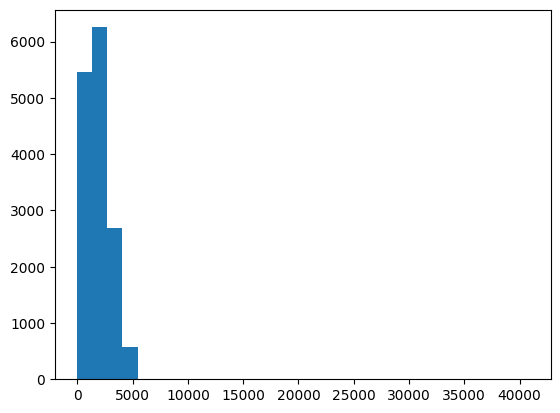

In [133]:
plt.hist(train_df['N_Days'], bins = 30)

{'whiskers': [<matplotlib.lines.Line2D at 0x11f847b00>,
 'caps': [<matplotlib.lines.Line2D at 0x11f847fe0>,
 'boxes': [<matplotlib.lines.Line2D at 0x11f8477d0>],
 'medians': [<matplotlib.lines.Line2D at 0x11f874620>],
 'fliers': [<matplotlib.lines.Line2D at 0x11f874920>],
 'means': []}

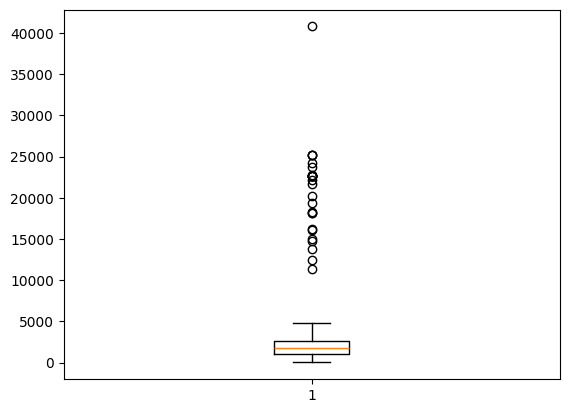

In [134]:
plt.boxplot(train_df['N_Days'])

* Drug : 

In [135]:
train_df['Drug'].describe()

count                8564
unique                  2
top       D-penicillamine
freq                 4568
Name: Drug, dtype: object

In [136]:
train_df['Drug'].value_counts(dropna=False, normalize=True)
# Autant de placebo que de cachets
# Beaucoup de variables manquantes
# Faut il :
# - considérer les NaN comme des valeurs manquantes

Drug
NaN                0.429067
D-penicillamine    0.304533
Placebo            0.266400
Name: proportion, dtype: float64

In [137]:
# Si on recode les NaN en "non-suivi" :
# train_df['Drug'] = train_df['Drug'].fillna('non-suivi').astype(str)


In [138]:
from collections import Counter
frequencies = Counter(train_df['Drug'])
frequencies

Counter({nan: 6436, 'D-penicillamine': 4568, 'Placebo': 3996})

In [139]:
labels = list(frequencies.keys())
values = list(frequencies.values()) 

<BarContainer object of 2 artists>

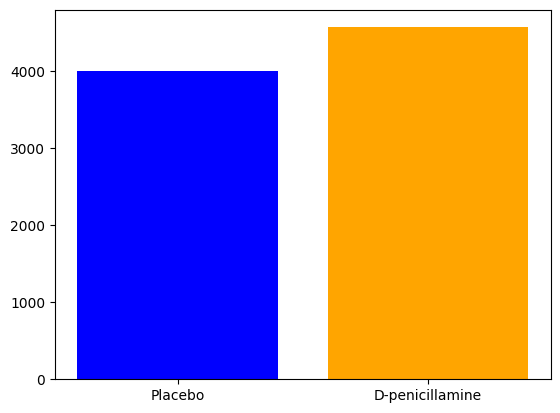

In [140]:
plt.bar(labels[1:], values[1:], color=['blue', 'orange'])

* Age : 

In [141]:
train_df['Age'].describe()
# valeur minimale extremement petite
# on constate que le max de N_days est suppérieur à l'age max ce qui pose problème

count    15000.000000
mean     19248.502373
std       3697.546749
min        133.300000
25%      16374.000000
50%      19544.000000
75%      22369.000000
max      35472.000000
Name: Age, dtype: float64

In [142]:
train_df[train_df['Age']<train_df['N_Days']]
# problème à ce niveau car il est impossible d'avoir un age inferieur au nombre de jour de traitement
# on constate que ce problème est lié aux valeurs(abberantes) minimales

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
1263,1263,2995,Placebo,2990.0,F,N,N,N,N,0.9,314.0,3.48,18.0,1164.0,71.00,260.0,340.0,10.0,2.0,C
4216,4216,2504,D-penicillamine,133.3,F,N,N,N,N,2.1,NaN,3.00,24.0,1828.0,133.30,NaN,474.0,10.1,3.0,C
5860,5860,3445,D-penicillamine,133.3,F,N,Y,N,N,2.3,NaN,3.61,39.0,1828.0,133.30,NaN,123.0,10.3,4.0,D
14686,14686,13728,Placebo,13727.0,F,Y,Y,N,Y,12.2,373.0,2.94,150.0,1029.0,119.35,151.0,399.0,11.6,4.0,D
14692,14692,40795,D-penicillamine,17874.0,F,N,N,Y,N,1.4,486.0,3.45,32.0,2201.0,117.80,70.0,410.0,11.7,3.0,C


In [143]:
# si N_Days > Age, alors N_Days = Age
train_df.loc[train_df['N_Days'] > train_df['Age'], 'N_Days'] = train_df['Age']

/var/folders/74/x3782kls1rv6qscx40xcj5rm0000gn/T/ipykernel_15129/3677733665.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[ 2990.    133.3   133.3 13727.  17874. ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  train_df.loc[train_df['N_Days'] > train_df['Age'], 'N_Days'] = train_df['Age']


In [144]:
train_df[train_df['Age']<train_df['N_Days']]


,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status


In [145]:
# probleme avec age qui est en jour
train_df['Age'] = round(train_df['Age'] / 365, 0)

In [146]:
train_df['Age'].describe()

count    15000.000000
mean        52.722133
std         10.102666
min          0.000000
25%         45.000000
50%         54.000000
75%         61.000000
max         97.000000
Name: Age, dtype: float64

In [147]:
train_df['N_Days'].describe()

count    15000.00000
mean      1965.09144
std       1324.79839
min          3.00000
25%       1092.00000
50%       1785.00000
75%       2635.00000
max      25202.00000
Name: N_Days, dtype: float64

In [148]:
# age mettre en int
train_df['Age'] = train_df['Age'].astype('int')

(array([5.000e+00, 1.000e+00, 4.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 4.400e+01, 1.080e+02, 6.800e+02, 6.140e+02,
        1.296e+03, 1.086e+03, 1.084e+03, 1.374e+03, 1.764e+03, 2.249e+03,
        9.850e+02, 2.124e+03, 8.250e+02, 6.280e+02, 4.700e+01, 7.100e+01,
        8.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00]),
 array([ 0.        ,  3.23333333,  6.46666667,  9.7       , 12.93333333,
        16.16666667, 19.4       , 22.63333333, 25.86666667, 29.1       ,
        32.33333333, 35.56666667, 38.8       , 42.03333333, 45.26666667,
        48.5       , 51.73333333, 54.96666667, 58.2       , 61.43333333,
        64.66666667, 67.9       , 71.13333333, 74.36666667, 77.6       ,
        80.83333333, 84.06666667, 87.3       , 90.53333333, 93.76666667,
        97.        ]),
 <BarContainer object of 30 artists>)

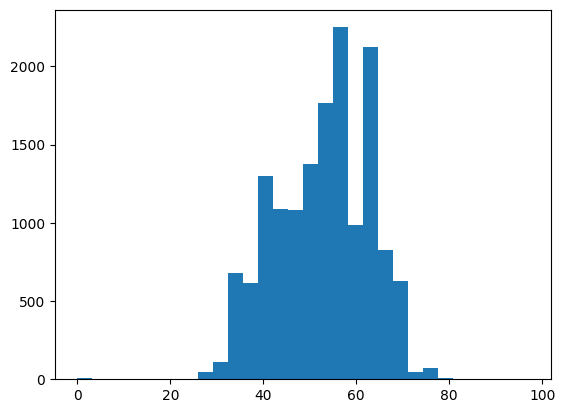

In [149]:
plt.hist(train_df['Age'], bins=30)

{'whiskers': [<matplotlib.lines.Line2D at 0x11f9ad220>,
 'caps': [<matplotlib.lines.Line2D at 0x11f9ad7f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x11f9acf50>],
 'medians': [<matplotlib.lines.Line2D at 0x11f9add90>],
 'fliers': [<matplotlib.lines.Line2D at 0x11f9ae060>],
 'means': []}

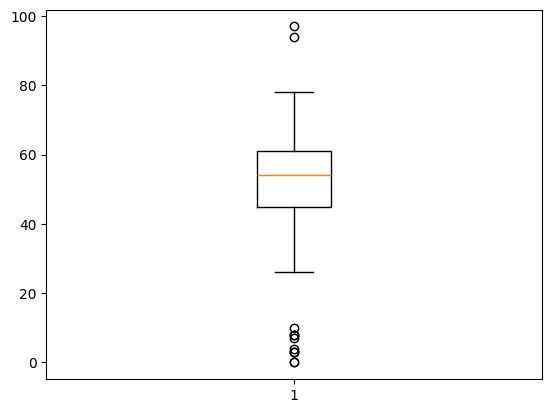

In [150]:
plt.boxplot(train_df['Age'])

In [151]:
# On remarque toujours la présence de valeurs très petites pour l'âge
# possible que l'étude ait été faite sur des enfants mais se renseigner quand meme 

In [152]:
train_df['Age'].min()
# 3 ans est ce un age convenable ou trop jeune ?

np.int64(0)

* Sex :

In [153]:
train_df['Sex'].describe()


count     15000
unique        2
top           F
freq      14403
Name: Sex, dtype: object

In [154]:
train_df['Sex'].value_counts(dropna=False, normalize=True) 
# Prendre en compte dans l'analyse que 97% des individus sont des femmes 

Sex
F    0.9602
M    0.0398
Name: proportion, dtype: float64

* Ascites : Présence d’ascite (accumulation de liquide dans la cavité abdominale). Valeurs possibles : Yes, No, ou NA (inconnue).

In [155]:
train_df['Ascites'].describe()

count     8563
unique       4
top          N
freq      8178
Name: Ascites, dtype: object

In [156]:
train_df['Ascites'].value_counts()

Ascites
N                  8178
Y                   383
S                     1
D-penicillamine       1
Name: count, dtype: int64

In [157]:
# parfois on a des cases vides, ou des cases avec 'NA', 'None', 'nan' mais Python les détecte 
# pas toujours de la même façon
# je fais la somme des NA et des colonnes non nulles pour m'en assurer
def case_vide (var):
    print("NA : ", train_df[var].isna().sum())
    print("Notnull : ", train_df[var].notnull().sum())
    print("vide : ", len (train_df) - (train_df[var].isna().sum() + train_df[var].notnull().sum()))

case_vide('Ascites')

NA :  6437
Notnull :  8563
vide :  0


In [158]:
# regarder les valeurs où on a la modalité S et D-penicillamine:
train_df[(train_df['Ascites'] =="S")|(train_df['Ascites'] =="D-penicillamine")]


,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
6245,6245,552.0,Placebo,61,F,S,Y,Y,S,3.6,375.0,3.35,4.0,1110.0,96.1,432.0,354.0,12.4,2.0,D
7046,7046,3239.0,D-penicillamine,56,F,D-penicillamine,N,N,N,0.6,271.0,3.80,210.0,6456.2,120.9,55.0,467.0,11.0,3.0,C


In [159]:
# remplacer les modalités 'S' et 'D-penicillamine' par des NaN
train_df['Ascites'] = train_df['Ascites'].replace(['S', 'D-penicillamine'], np.nan)

In [160]:
train_df[(train_df['Ascites'] =="S")|(train_df['Ascites'] =="D-penicillamine")]


,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status


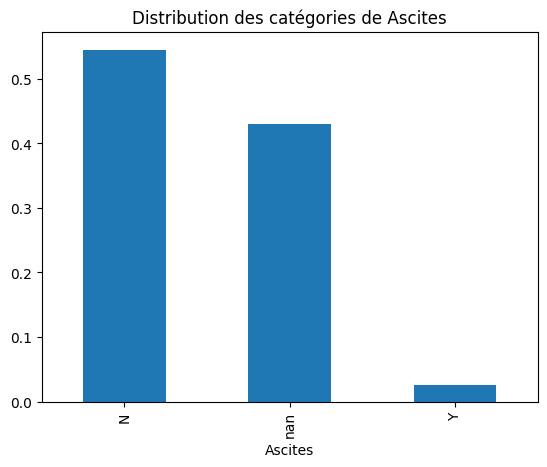

In [161]:
freq=train_df['Ascites'].value_counts(dropna=False, normalize=True)
freq.plot(kind='bar')
plt.title('Distribution des catégories de Ascites')
plt.show()

* Hepatomegaly : présence ou non d'une hépatomégalie, qui est une augmentation anormale de la taille du foie

In [162]:
train_df['Hepatomegaly'].value_counts(normalize=True,dropna=False )

Hepatomegaly
NaN       0.429067
N         0.304267
Y         0.266600
119.35    0.000067
Name: proportion, dtype: float64

In [163]:
train_df[train_df['Hepatomegaly']=='119.35']

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
2198,2198,110.0,Placebo,61,F,Y,119.35,Y,Y,17.4,NaN,2.31,182.0,1029.0,119.35,NaN,401.0,12.2,4.0,D


In [164]:
# remplacer les modalités '119.35' par un NA
train_df['Hepatomegaly'] = train_df['Hepatomegaly'].replace('119.35', np.nan)

In [165]:
train_df = train_df[~(train_df['Hepatomegaly']=='119.35')]

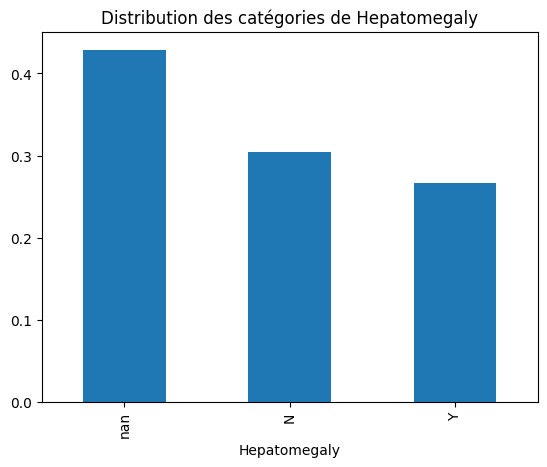

In [166]:
freq=train_df['Hepatomegaly'].value_counts(dropna=False, normalize=True)
freq.plot(kind='bar')
plt.title('Distribution des catégories de Hepatomegaly')
plt.show()

* Spiders : présence de spiders angiomas -> signes cliniques courants dans les maladies du foie, notamment dans la cirrhose ou l'hypertension portale.

In [167]:
train_df['Spiders'].value_counts(normalize=True,dropna=False )

Spiders
N      0.451533
NaN    0.429667
Y      0.118800
Name: proportion, dtype: float64

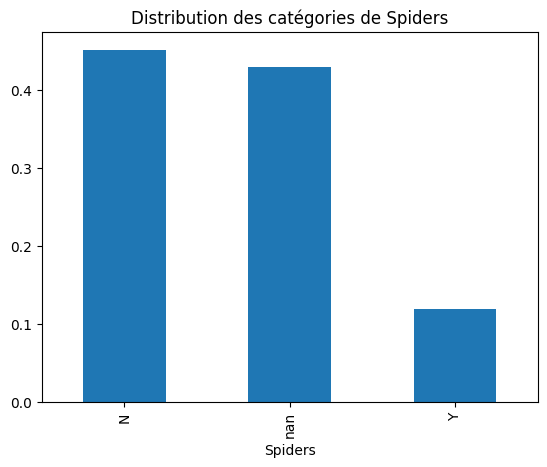

In [168]:
freq=train_df['Spiders'].value_counts(dropna=False, normalize=True)
freq.plot(kind='bar')
plt.title('Distribution des catégories de Spiders')
plt.show()

* Edema : présence d'œdème, qui est un gonflement causé par l'accumulation de liquide dans les tissus du corps

In [169]:
train_df['Edema'].value_counts(normalize=True,dropna=False )


Edema
N    0.921533
S    0.054067
Y    0.024400
Name: proportion, dtype: float64

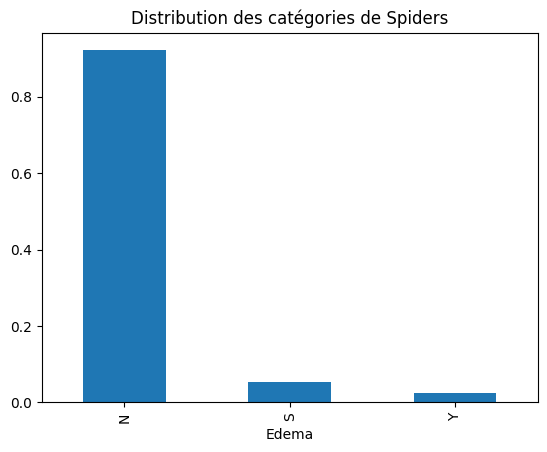

In [170]:
freq=train_df['Edema'].value_counts(dropna=False, normalize=True)
freq.plot(kind='bar')
plt.title('Distribution des catégories de Spiders')
plt.show()

* Bilirubin : substance chimique produite lors de la dégradation normale des globules rouges. Elle est un indicateur clé de la fonction hépatique, car le foie joue un rôle essentiel dans la transformation et l'élimination de la bilirubine du corps.

In [171]:
train_df['Bilirubin'].describe()
# Présence de valeurs extrêmes : anomalie sérieuse. Cela pourrait être associé à des pathologies graves comme une obstruction des voies biliaires, une hépatite aiguë, ou une hémolyse massive.
# Moyenne légèrement uspérieur à la normale (0.3 et 1.2 mg/dL)
# Ecart type élevé par rapport à la moyenne : grande variabilité des taux de bilirubine dans cette population
# 25% des valeurs sont inférieures à 0.6 mg/dL, ce qui est dans la normale.
# La médiane (50%) est 0.9 mg/dL, ce qui est également dans la plage normale.
# 75% des valeurs sont inférieures à 1.8 mg/dL, ce qui est proche de la limite supérieure normale.

count    15000.000000
mean         1.861462
std          2.752375
min          0.300000
25%          0.600000
50%          0.900000
75%          1.800000
max         28.000000
Name: Bilirubin, dtype: float64

(array([9.662e+03, 2.339e+03, 9.440e+02, 6.630e+02, 3.180e+02, 1.880e+02,
        2.040e+02, 1.420e+02, 8.800e+01, 2.600e+01, 4.000e+00, 2.400e+01,
        4.900e+01, 2.900e+01, 8.000e+01, 4.200e+01, 2.000e+00, 5.700e+01,
        8.700e+01, 1.800e+01, 0.000e+00, 7.000e+00, 0.000e+00, 6.000e+00,
        1.000e+01, 0.000e+00, 6.000e+00, 3.000e+00, 0.000e+00, 2.000e+00]),
 array([ 0.3       ,  1.22333333,  2.14666667,  3.07      ,  3.99333333,
         4.91666667,  5.84      ,  6.76333333,  7.68666667,  8.61      ,
         9.53333333, 10.45666667, 11.38      , 12.30333333, 13.22666667,
        14.15      , 15.07333333, 15.99666667, 16.92      , 17.84333333,
        18.76666667, 19.69      , 20.61333333, 21.53666667, 22.46      ,
        23.38333333, 24.30666667, 25.23      , 26.15333333, 27.07666667,
        28.        ]),
 <BarContainer object of 30 artists>)

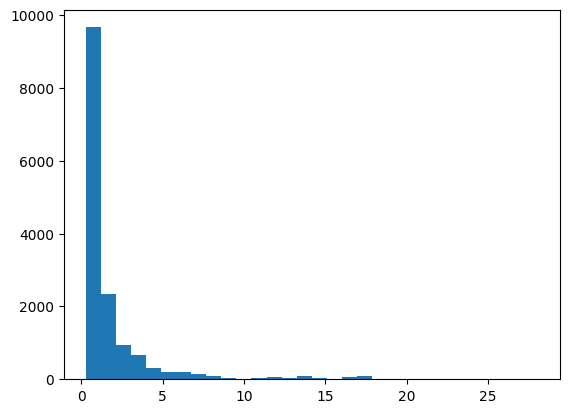

In [172]:
plt.hist(train_df['Bilirubin'], bins=30)

* **Cholesterol** : 

est une substance grasse (lipide) essentielle au bon fonctionnement de l'organisme. Il est impliqué dans la production des hormones, la fabrication des membranes cellulaires et la synthèse de la vitamine D. On distingue deux types principaux :

- Le cholestérol LDL ("mauvais cholestérol") : en excès, il peut s'accumuler dans les parois des artères et favoriser les maladies cardiovasculaires.

- Le cholestérol HDL ("bon cholestérol") : il aide à éliminer l'excès de cholestérol LDL en le transportant vers le foie pour être éliminé.

Mesures du cholestérol selon le risque cardiovasculaire :

Les seuils de cholestérol recommandés varient en fonction du niveau de risque cardiovasculaire (évalué par des facteurs comme l'âge, le tabagisme, l'hypertension, le diabète, ou des antécédents familiaux). Voici les objectifs selon le risque :

- Risque faible ou modéré :\
Cholestérol LDL : < 3 g/L (ou 1,15 mmol/L). \
HDL : > 0,4 g/L (ou 1 mmol/L). \
Cholestérol total : < 5 g/L (ou 1,93 mmol/L).

- Risque élevé (par exemple, si diabète ou maladie cardiovasculaire légère) :\
LDL : < 2,6 g/L (ou 1 mmol/L).

- Risque très élevé (antécédents de maladie cardiovasculaire grave ou facteurs multiples) :\
LDL : < 1,8 g/L (ou 0,7 mmol/L).

Prévention et traitement :
- Mode de vie : alimentation équilibrée (pauvre en graisses saturées, riche en fibres), activité physique régulière, arrêt du tabac.
- Traitements médicaux : si nécessaire, les statines ou autres médicaments hypolipémiants peuvent être prescrits pour atteindre les objectifs.
Une consultation médicale régulière est essentielle pour évaluer le risque et ajuster le suivi.

In [173]:
# Calcul des statistiques basiques. On se rend compte que c'est en dg/dl. 
train_df['Cholesterol'].describe()

count    6669.000000
mean      327.670115
std       179.801705
min       120.000000
25%       242.000000
50%       280.000000
75%       360.000000
max      1790.000000
Name: Cholesterol, dtype: float64

In [174]:
# Passage de dg/dL --> g/L
train_df['Cholesterol'] = train_df['Cholesterol']/100

In [175]:
train_df['Cholesterol'].describe()
# moyenne relativement basse : bonne santé ou un groupe avec un contrôle strict de leur cholestérol (par exemple, régime ou médicaments).
# l'écart-type : variabilité importante dans les taux de cholestérol
# valeur extrême : extrêmement élevé et dépasse largement les seuils normaux -> cas graves d'hypercholestérolémie 

count    6669.000000
mean        3.276701
std         1.798017
min         1.200000
25%         2.420000
50%         2.800000
75%         3.600000
max        17.900000
Name: Cholesterol, dtype: float64

In [176]:
# Présence importante de valeurs manquantes (55% cf. Statistiques descriptives générales).
int(train_df['Cholesterol'].isna().count())

15000

(array([ 173., 1016., 2350., 1238.,  694.,  466.,  264.,   82.,  135.,
          91.,    0.,    0.,   13.,    0.,   36.,   17.,    5.,    7.,
          11.,    0.,   14.,    7.,    0.,    0.,   10.,    0.,    5.,
           0.,   15.,   20.]),
 array([ 1.2       ,  1.75666667,  2.31333333,  2.87      ,  3.42666667,
         3.98333333,  4.54      ,  5.09666667,  5.65333333,  6.21      ,
         6.76666667,  7.32333333,  7.88      ,  8.43666667,  8.99333333,
         9.55      , 10.10666667, 10.66333333, 11.22      , 11.77666667,
        12.33333333, 12.89      , 13.44666667, 14.00333333, 14.56      ,
        15.11666667, 15.67333333, 16.23      , 16.78666667, 17.34333333,
        17.9       ]),
 <BarContainer object of 30 artists>)

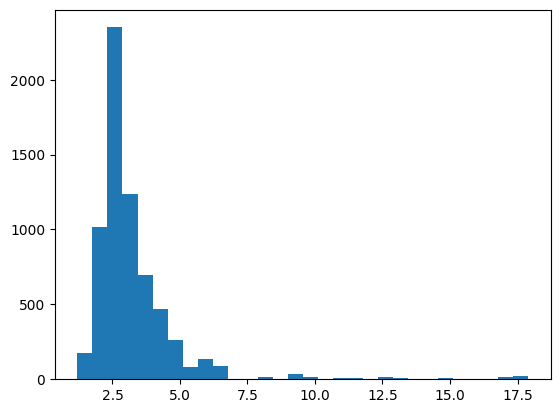

In [177]:
plt.hist(train_df['Cholesterol'], bins=30)

{'whiskers': [<matplotlib.lines.Line2D at 0x11fc1ab10>,
 'caps': [<matplotlib.lines.Line2D at 0x11fc1b140>,
 'boxes': [<matplotlib.lines.Line2D at 0x11fbad190>],
 'medians': [<matplotlib.lines.Line2D at 0x11fc1b6e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x11fc1b980>],
 'means': []}

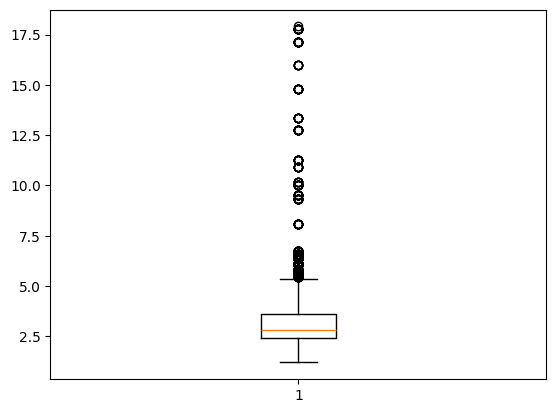

In [178]:
plt.boxplot(train_df['Cholesterol'].dropna())

In [179]:
# Relation de Cholesterol avec les autres variables
cholesterol_zeros = train_df[train_df['Cholesterol'].isnull()]

In [180]:
cholesterol_zeros.count()

id               8331
N_Days           8331
Drug             1896
Age              8331
Sex              8331
Ascites          1895
Hepatomegaly     1895
Spiders          1887
Edema            8331
Bilirubin        8331
Cholesterol         0
Albumin          8331
Copper           1841
Alk_Phos         1890
SGOT             1887
Tryglicerides       6
Platelets        7974
Prothrombin      8305
Stage            8331
Status           8331
dtype: int64

* **Albumin** :

est une protéine produite principalement par le foie. Elle joue un rôle crucial dans le maintien de la pression osmotique (qui empêche les fluides de s'échapper des vaisseaux sanguins), le transport de nombreuses substances (hormones, médicaments, acides gras, etc.) et le bon fonctionnement général du métabolisme.


Mesures de l'albumine selon le risque :

Le taux d'albumine est évalué par des analyses de sang ou d'urine. Les valeurs normales varient légèrement selon les laboratoires, mais les moyennes sont :

Albumine sérique (dans le sang) : \
- Normale : 35 à 50 g/L (3,5 à 5 g/dL). \
- Faible albumine (hypoalbuminémie) : < 35 g/L. Cela peut indiquer des maladies du foie, des reins, une malnutrition ou des inflammations chroniques. \
- Albumine élevée (hyperalbuminémie) : Rare et souvent liée à une déshydratation.

Albuminurie (albumine dans les urines) :\
- Normale : < 30 mg/24h.\
- Microalbuminurie (léger excès, signe de risque rénal) : 30-300 mg/24h.\
- Macroalbuminurie (excès important, souvent associé à une maladie rénale avancée) : > 300 mg/24h.

Risques associés aux variations de l'albumine :

Hypoalbuminémie : Peut indiquer des problèmes tels que : \
- Insuffisance hépatique (cirrhose, hépatite).\
- Maladies rénales (syndrome néphrotique).\
- Malnutrition ou carences sévères.\
- Inflammations chroniques ou cancers.

Microalbuminurie : Fréquemment un marqueur précoce de maladies rénales ou d’un risque accru de maladies cardiovasculaires, notamment chez les diabétiques ou hypertendus.

In [181]:
# Mesure en g/L
train_df['Albumin'].describe()
# valeur extreme minimale : cas de malnutrition, d'insuffisance hépatique, de syndrome néphrotique ou d'inflammation chronique
# le reste semble normal

count    15000.000000
mean         3.525314
std          0.369981
min          1.800000
25%          3.290000
50%          3.580000
75%          3.770000
max          4.640000
Name: Albumin, dtype: float64

(array([1.000e+00, 2.000e+00, 1.000e+00, 9.000e+00, 2.100e+01, 4.000e+01,
        4.300e+01, 8.700e+01, 6.200e+01, 6.100e+01, 1.640e+02, 1.840e+02,
        9.410e+02, 5.970e+02, 9.370e+02, 8.540e+02, 1.640e+03, 1.243e+03,
        7.620e+02, 2.295e+03, 1.457e+03, 1.312e+03, 9.220e+02, 5.210e+02,
        4.090e+02, 1.510e+02, 5.300e+01, 1.200e+02, 4.400e+01, 6.700e+01]),
 array([1.8       , 1.89466667, 1.98933333, 2.084     , 2.17866667,
        2.27333333, 2.368     , 2.46266667, 2.55733333, 2.652     ,
        2.74666667, 2.84133333, 2.936     , 3.03066667, 3.12533333,
        3.22      , 3.31466667, 3.40933333, 3.504     , 3.59866667,
        3.69333333, 3.788     , 3.88266667, 3.97733333, 4.072     ,
        4.16666667, 4.26133333, 4.356     , 4.45066667, 4.54533333,
        4.64      ]),
 <BarContainer object of 30 artists>)

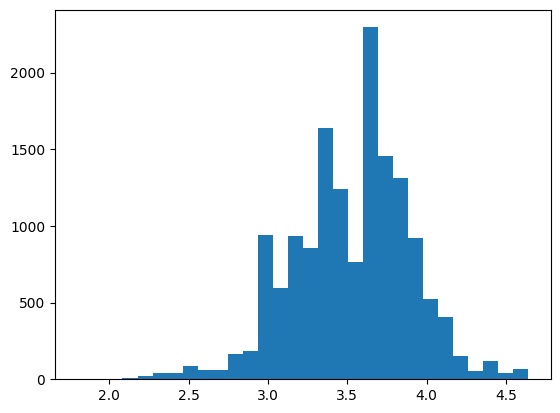

In [182]:
plt.hist(train_df['Albumin'], bins=30)

{'whiskers': [<matplotlib.lines.Line2D at 0x11fd219d0>,
 'caps': [<matplotlib.lines.Line2D at 0x11fd21f70>,
 'boxes': [<matplotlib.lines.Line2D at 0x11fced190>],
 'medians': [<matplotlib.lines.Line2D at 0x11fc4e450>],
 'fliers': [<matplotlib.lines.Line2D at 0x11fd226c0>],
 'means': []}

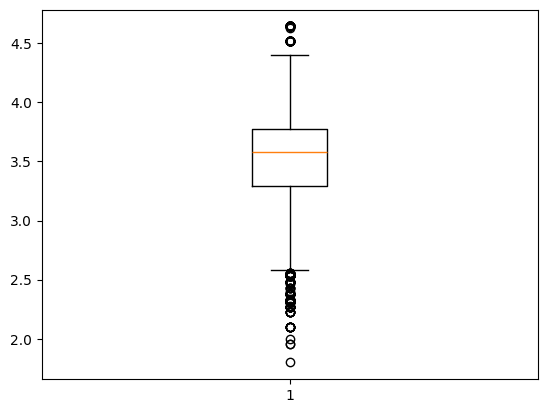

In [183]:
plt.boxplot(train_df['Albumin'])

* **Copper** :
est un oligo-élément essentiel présent en petite quantité dans l'organisme. Il joue un rôle clé dans de nombreux processus biologiques, tels que :

- La production d'énergie (fonctionnement des enzymes).
- La formation des globules rouges et la régulation du système immunitaire.
- La synthèse du collagène et l'entretien des os, des nerfs et des tissus conjonctifs.
- Le cuivre est principalement absorbé par l'alimentation et stocké dans le foie.

Mesures du cuivre selon le risque :

Le taux de cuivre est mesuré dans le sang (cuivre sérique) ou dans l'urine (cuivre urinaire). Les valeurs normales dépendent des laboratoires, mais les moyennes sont :

Cuivre sérique (sanguin) :\
- Normale : 70 à 140 µg/dL (11 à 22 µmol/L).\
- Cuivre élevé : Peut indiquer des maladies comme la maladie de Wilson, des intoxications ou des désordres métaboliques.\
- Cuivre bas : Peut être lié à des carences nutritionnelles, des maladies intestinales (malabsorption) ou des troubles génétiques.\

Cuivre urinaire :\
- Utilisé pour détecter des excès ou surveiller la maladie de Wilson.\
- Normale : < 40 µg/24 heures.\
- Élevé : > 100 µg/24 heures, souvent associé à une surcharge de cuivre.

Risques liés aux variations de cuivre : 

Excès de cuivre (hypercuprémie) :

- Causes : intoxication au cuivre, maladie de Wilson (trouble génétique causant une accumulation toxique de cuivre dans le foie, le cerveau et les organes).
- Symptômes : fatigue, douleurs abdominales, jaunisse, troubles neurologiques.

Carence en cuivre (hypocuprémie) :

- Causes : malnutrition, malabsorption (ex. : maladie cœliaque, chirurgie intestinale), ou troubles génétiques.
- Symptômes : anémie, faiblesse, troubles neurologiques, fragilité osseuse.

In [184]:
# Les mesures semblent être en µg/dL.
train_df['Copper'].describe()
# Écart-type énorme par rapport à la moyenne : très grande variabilité dans les taux de cuivre. Cela est inhabituel et suggère que certains individus ont des taux de cuivre extrêmement élevés ou extrêmement bas.
# 25% des individus ont des taux inférieurs à 31 µg/dL :  très bas et en dehors de la plage normale (déficience probable).
# La médiane (50%) est de 52 µg/dL: sous la limite normale pour les adultes (70 µg/dL). Cela suggère que la majorité des individus de cet échantillon ont des niveaux de cuivre insuffisants.
# 75% des individus ont des taux inférieurs à 86 µg/dL, ce qui est légèrement dans la norme, mais globalement encore bas.
# valeurs extremes maximale :  cas de toxicité au cuivre, ce qui peut survenir dans des situations comme :Maladie de Wilson (accumulation excessive de cuivre), Consommation excessive de cuivre (eau contaminée, compléments alimentaires), Troubles métaboliques rares.
# valeurs extremes minimale : peut être associé à des déficiences sévères en cuivre.

count    8452.000000
mean       74.715689
std        74.211915
min         4.000000
25%        31.000000
50%        52.000000
75%        86.000000
max       588.000000
Name: Copper, dtype: float64

In [185]:
# Présence importante des NA. 
int(train_df['Copper'].isna().sum())

6548

(array([1.317e+03, 2.168e+03, 1.495e+03, 1.258e+03, 4.790e+02, 2.980e+02,
        3.090e+02, 2.540e+02, 2.180e+02, 8.500e+01, 1.470e+02, 1.860e+02,
        2.700e+01, 4.700e+01, 3.700e+01, 5.000e+00, 1.000e+00, 0.000e+00,
        1.100e+01, 1.100e+01, 7.000e+00, 1.000e+00, 1.600e+01, 3.700e+01,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+01, 2.800e+01]),
 array([  4.        ,  23.46666667,  42.93333333,  62.4       ,
         81.86666667, 101.33333333, 120.8       , 140.26666667,
        159.73333333, 179.2       , 198.66666667, 218.13333333,
        237.6       , 257.06666667, 276.53333333, 296.        ,
        315.46666667, 334.93333333, 354.4       , 373.86666667,
        393.33333333, 412.8       , 432.26666667, 451.73333333,
        471.2       , 490.66666667, 510.13333333, 529.6       ,
        549.06666667, 568.53333333, 588.        ]),
 <BarContainer object of 30 artists>)

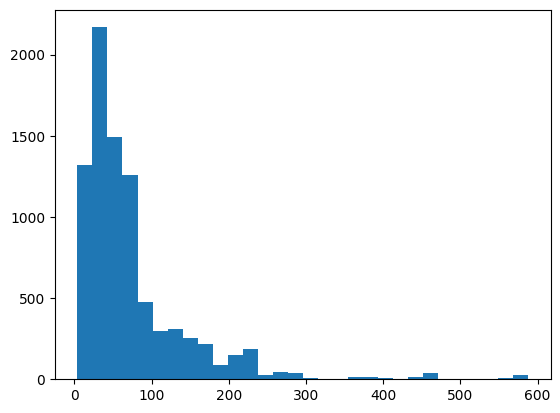

In [186]:
plt.hist(train_df['Copper'], bins=30)

{'whiskers': [<matplotlib.lines.Line2D at 0x11fe07890>,
 'caps': [<matplotlib.lines.Line2D at 0x11fe07e30>,
 'boxes': [<matplotlib.lines.Line2D at 0x11fe04200>],
 'medians': [<matplotlib.lines.Line2D at 0x11fd02d50>],
 'fliers': [<matplotlib.lines.Line2D at 0x11fe385c0>],
 'means': []}

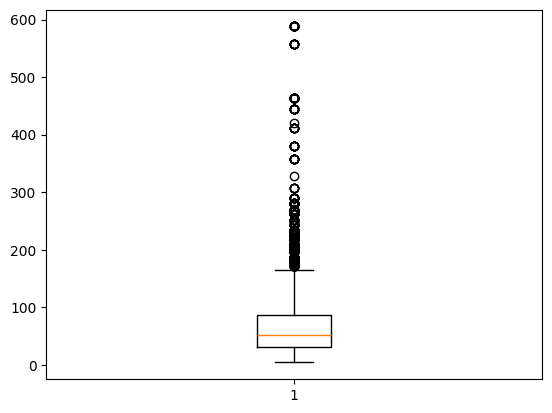

In [187]:
plt.boxplot(train_df['Copper'].dropna())

* **Alk_phos** : 

sont des enzymes présentes dans plusieurs tissus de l’organisme, principalement dans le foie, les os, les reins et la bile. Elles jouent un rôle essentiel dans le métabolisme, en aidant à décomposer les protéines. Le dosage de l’ALP dans le sang est utilisé pour évaluer la santé du foie et des os.

Mesures des phosphatases alcalines selon le risque : 

Les valeurs normales peuvent varier selon les laboratoires, mais les moyennes sont :

Normale : 30 à 120 U/L (unités par litre).

ALP élevée (hyperphosphatasémie) :

Des niveaux élevés peuvent indiquer :

Affections hépatiques :
- Cholestase (obstruction des voies biliaires).
- Hépatite ou cirrhose.

Maladies osseuses :
- Maladie de Paget.
- Fractures en guérison.
- Métastases osseuses.

Autres causes : grossesse, maladies inflammatoires ou certains cancers.

ALP basse (hypophosphatasémie) :

Des niveaux faibles peuvent indiquer :

- Déficit nutritionnel : carence en zinc ou en magnésium.\
- Hypophosphatasie : une maladie génétique rare affectant le métabolisme osseux.\
- Troubles endocriniens : hypothyroïdie.


In [188]:
train_df['Alk_Phos'].describe()
# moyenne élevée :  population avec des anomalies importantes, telles que des maladies hépatiques, osseuses ou d'autres conditions spécifiques.
# écart-type élevé : variabilité importante dans les taux d'alkaline phosphatase.
# 25% des valeurs sont inférieures à 70 U/L, ce qui est dans la plage normale.
# La médiane (50%) est de 85 U/L, ce qui est également dans la plage normale.
# 75% des valeurs sont inférieures à 120 U/L, ce qui est proche de la limite supérieure normale.
# valeurs extremes maximale : cas graves de maladies hépatiques, osseuses ou d'autres conditions spécifiques.
# valeurs extremes minimale : cas graves de maladies hépatiques, osseuses ou d'autres conditions spécifiques.

count     8558.000000
mean      1667.605282
std       1861.746315
min         16.000000
25%        721.000000
50%       1072.000000
75%       1691.250000
max      19270.000000
Name: Alk_Phos, dtype: float64

In [189]:
int(train_df['Alk_Phos'].isna().sum())

6442

{'whiskers': [<matplotlib.lines.Line2D at 0x11fe6e600>,
 'caps': [<matplotlib.lines.Line2D at 0x11fe6ebd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x11fe6e360>],
 'medians': [<matplotlib.lines.Line2D at 0x11fe6eff0>],
 'fliers': [<matplotlib.lines.Line2D at 0x11fe6f290>],
 'means': []}

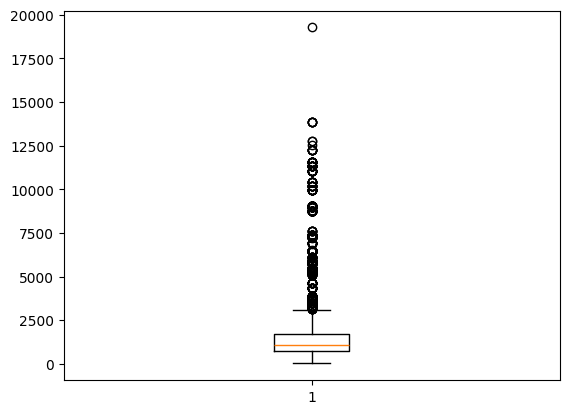

In [190]:
plt.boxplot(train_df['Alk_Phos'].dropna())

(array([1.105e+03, 4.468e+03, 1.488e+03, 6.090e+02, 7.500e+01, 1.180e+02,
        3.300e+01, 2.200e+01, 1.290e+02, 4.900e+01, 1.430e+02, 9.600e+01,
        0.000e+00, 5.400e+01, 8.000e+01, 2.200e+01, 8.000e+00, 4.300e+01,
        0.000e+00, 1.000e+01, 0.000e+00, 5.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([1.60000e+01, 6.57800e+02, 1.29960e+03, 1.94140e+03, 2.58320e+03,
        3.22500e+03, 3.86680e+03, 4.50860e+03, 5.15040e+03, 5.79220e+03,
        6.43400e+03, 7.07580e+03, 7.71760e+03, 8.35940e+03, 9.00120e+03,
        9.64300e+03, 1.02848e+04, 1.09266e+04, 1.15684e+04, 1.22102e+04,
        1.28520e+04, 1.34938e+04, 1.41356e+04, 1.47774e+04, 1.54192e+04,
        1.60610e+04, 1.67028e+04, 1.73446e+04, 1.79864e+04, 1.86282e+04,
        1.92700e+04]),
 <BarContainer object of 30 artists>)

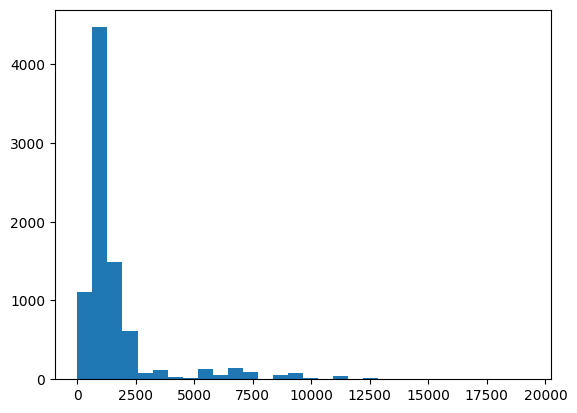

In [191]:
plt.hist(train_df['Alk_Phos'], bins=30)

* **SGOT** : 

est une enzyme présente principalement dans le foie, les muscles, le cœur et les reins. Elle intervient dans le métabolisme des acides aminés. Son dosage dans le sang est utilisé pour évaluer la santé du foie et détecter d’éventuels dommages aux tissus musculaires ou cardiaques.

Mesures du SGOT selon le risque :

Les valeurs normales varient selon les laboratoires, mais généralement :

Normale : 5 à 40 U/L (unités par litre).

SGOT élevé (augmentation de l'AST) :

Des niveaux élevés peuvent indiquer :

Affections hépatiques :

- Hépatite aiguë ou chronique.
- Cirrhose ou stéatose hépatique (foie gras).
- Dommages liés à l'alcool ou aux médicaments.

Problèmes cardiaques :

Infarctus du myocarde (crise cardiaque).

Dommages musculaires :

- Myopathies ou blessures musculaires.

Autres causes : maladies métaboliques, pancréatite, hémolyse.

SGOT bas :

Un SGOT faible est rarement préoccupant mais peut être observé en cas de carence en vitamine B6.

In [192]:
# (AST - Aspartate Aminotransferase), un marqueur enzymatique lié à la santé du foie et des muscles. Mesuré en U/L.
train_df['SGOT'].describe()
# moyenne élevée : souvent associées à des dommages tissulaires, en particulier au foie ou aux muscles.
# écart-type est de 56.51 U/L : variabilité significative des taux 
# valeur extreme maximale : peut indiquer des lésions graves
# valeur extreme minimale : indique qu'il y a aussi des individus en bonne santé

count    8555.000000
mean      106.579545
std        56.493338
min         8.000000
25%        71.000000
50%        97.650000
75%       133.300000
max      2148.000000
Name: SGOT, dtype: float64

(array([3.260e+03, 3.971e+03, 1.143e+03, 9.200e+01, 6.600e+01, 0.000e+00,
        1.700e+01, 0.000e+00, 4.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([   8.        ,   79.33333333,  150.66666667,  222.        ,
         293.33333333,  364.66666667,  436.        ,  507.33333333,
         578.66666667,  650.        ,  721.33333333,  792.66666667,
         864.        ,  935.33333333, 1006.66666667, 1078.        ,
        1149.33333333, 1220.66666667, 1292.        , 1363.33333333,
        1434.66666667, 1506.        , 1577.33333333, 1648.66666667,
        1720.        , 1791.33333333, 1862.66666667, 1934.        ,
        2005.33333333, 2076.66666667, 2148.        ]),
 <BarContainer object of 30 artists>)

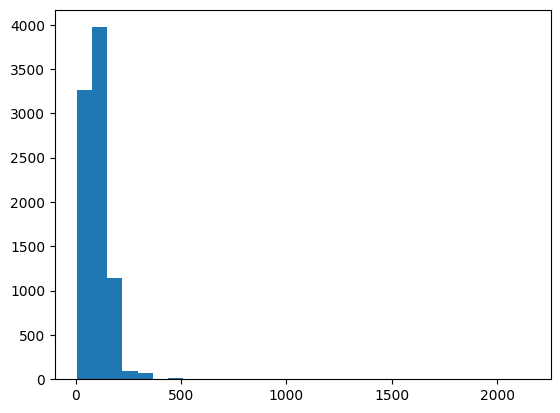

In [193]:
plt.hist(train_df['SGOT'], bins=30)

{'whiskers': [<matplotlib.lines.Line2D at 0x11f9ac470>,
 'caps': [<matplotlib.lines.Line2D at 0x11f830170>,
 'boxes': [<matplotlib.lines.Line2D at 0x11f9aec30>],
 'medians': [<matplotlib.lines.Line2D at 0x11f832a20>],
 'fliers': [<matplotlib.lines.Line2D at 0x11f846960>],
 'means': []}

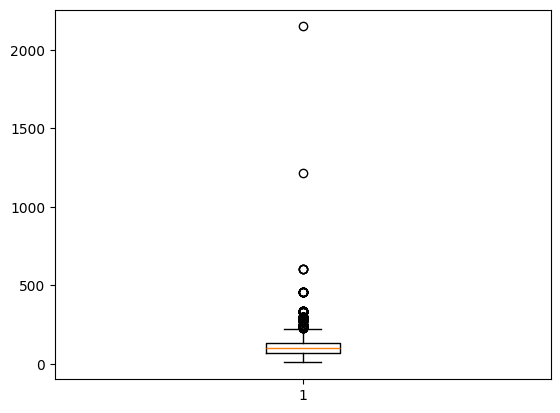

In [194]:
plt.boxplot(train_df['SGOT'].dropna())

* **Tryglicerides**


In [195]:
# évaluer les risques cardiovasculaires et métaboliques (lié au cholestérole . Mesure en mg/dL
train_df['Tryglicerides'].describe()
# moyenne normale
# écart type normal
# 25% des individus ont des triglycérides inférieurs à 80 mg/dL, ce qui est excellent et bien en dessous des limites normales.
# médiane (50%) est de 99 mg/dL, indiquant que la moitié des individus ont des triglycérides dans une plage normale et saine.
# 75% des individus ont des triglycérides inférieurs à 133 mg/dL, ce qui est également en dessous du seuil de 150 mg/dL pour des niveaux normaux.
# valeur extreme maximale : extrêmement élevé. Cela peut être dû à : Hypertriglycéridémie primaire (trouble génétique), Diabète mal contrôlé, Consommation excessive d'alcool, Syndrome métabolique ou obésité.
# valeur extreme minimale : très bas mais peut être normal chez certaines personnes .

count    6630.000000
mean      110.297097
std        49.676146
min        33.000000
25%        80.000000
50%        99.000000
75%       133.000000
max       598.000000
Name: Tryglicerides, dtype: float64

(array([  95., 1162., 1279., 1585.,  694.,  532.,  494.,  268.,  182.,
         122.,   95.,   16.,   45.,    7.,    7.,   25.,    0.,    0.,
           3.,    0.,    0.,   14.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    5.]),
 array([ 33.        ,  51.83333333,  70.66666667,  89.5       ,
        108.33333333, 127.16666667, 146.        , 164.83333333,
        183.66666667, 202.5       , 221.33333333, 240.16666667,
        259.        , 277.83333333, 296.66666667, 315.5       ,
        334.33333333, 353.16666667, 372.        , 390.83333333,
        409.66666667, 428.5       , 447.33333333, 466.16666667,
        485.        , 503.83333333, 522.66666667, 541.5       ,
        560.33333333, 579.16666667, 598.        ]),
 <BarContainer object of 30 artists>)

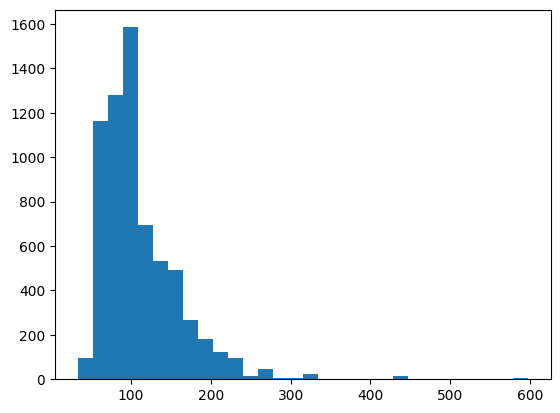

In [196]:
plt.hist(train_df['Tryglicerides'], bins=30)

{'whiskers': [<matplotlib.lines.Line2D at 0x11ecf6540>,
 'caps': [<matplotlib.lines.Line2D at 0x11ecf5be0>,
 'boxes': [<matplotlib.lines.Line2D at 0x11ed1b770>],
 'medians': [<matplotlib.lines.Line2D at 0x11ecad430>],
 'fliers': [<matplotlib.lines.Line2D at 0x11ecac230>],
 'means': []}

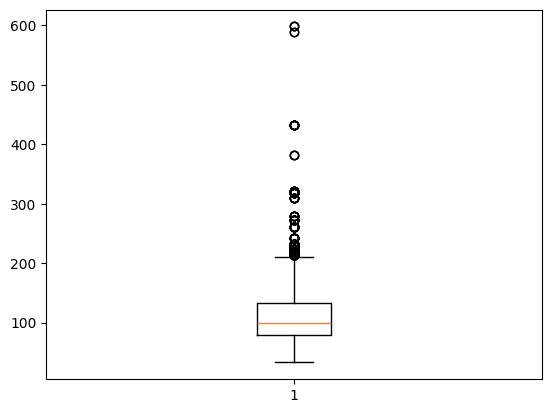

In [197]:
plt.boxplot(train_df['Tryglicerides'].dropna())

* **Platelets**

In [198]:
# Analyse des valeurs de plaquettes. Mesure : × 10³/µL
train_df['Platelets'].describe()
# moyenne normale
# écart type normal
# valeurs extremes maximale : considérablement élevé et peut être classé comme thrombocytose.
# valeurs extremes minimale : basse et représente une thrombopénie sévère

count    14414.000000
mean       253.822027
std         94.074989
min          0.400000
25%        183.000000
50%        251.000000
75%        312.000000
max        724.000000
Name: Platelets, dtype: float64

(array([   3.,    3.,   41.,  301.,  644., 1037., 1119.,  931.,  992.,
        1603., 1574., 1520., 1190., 1055.,  743.,  299.,  272.,  589.,
         197.,  128.,   27.,   46.,   46.,   39.,    0.,    0.,    0.,
           0.,    0.,   15.]),
 array([4.0000e-01, 2.4520e+01, 4.8640e+01, 7.2760e+01, 9.6880e+01,
        1.2100e+02, 1.4512e+02, 1.6924e+02, 1.9336e+02, 2.1748e+02,
        2.4160e+02, 2.6572e+02, 2.8984e+02, 3.1396e+02, 3.3808e+02,
        3.6220e+02, 3.8632e+02, 4.1044e+02, 4.3456e+02, 4.5868e+02,
        4.8280e+02, 5.0692e+02, 5.3104e+02, 5.5516e+02, 5.7928e+02,
        6.0340e+02, 6.2752e+02, 6.5164e+02, 6.7576e+02, 6.9988e+02,
        7.2400e+02]),
 <BarContainer object of 30 artists>)

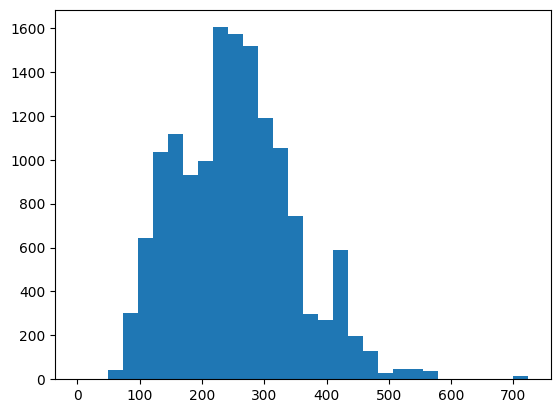

In [199]:
plt.hist(train_df['Platelets'], bins=30)

{'whiskers': [<matplotlib.lines.Line2D at 0x13887b500>,
 'caps': [<matplotlib.lines.Line2D at 0x13887b950>,
 'boxes': [<matplotlib.lines.Line2D at 0x11fba32c0>],
 'medians': [<matplotlib.lines.Line2D at 0x13887be90>],
 'fliers': [<matplotlib.lines.Line2D at 0x1388ac170>],
 'means': []}

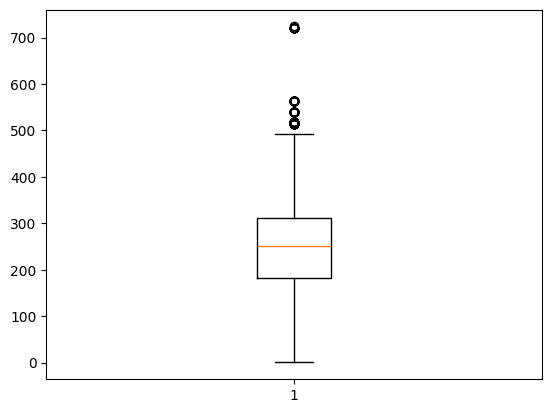

In [200]:
plt.boxplot(train_df['Platelets'].dropna())

* **Prothrombin**

In [201]:
# Indicateur de la coagulation sanguine et de la fonction hépatique. Mesure en secondes
train_df['Prothrombin'].describe()
# moyenne normale
# écart type normal
# valeurs extremes maximale : considérablement élevé et peut être un signe d'anomalies importantes.
# valeurs extremes minimale : 

count    14974.000000
mean        10.627748
std          0.741888
min          7.100000
25%         10.100000
50%         10.600000
75%         11.000000
max         18.000000
Name: Prothrombin, dtype: float64

* **Stage**

In [202]:
# Pas de valeurs manquantes pour cette variable
train_df['Stage'].value_counts(normalize=True, dropna=False)

Stage
3.0    0.376267
4.0    0.349267
2.0    0.225333
1.0    0.049133
Name: proportion, dtype: float64

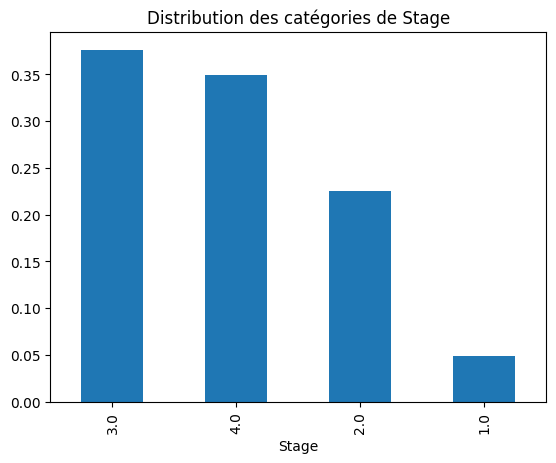

In [203]:
freq=train_df['Stage'].value_counts(dropna=False, normalize=True)
freq.plot(kind='bar')
plt.title('Distribution des catégories de Stage')
plt.show()

* **Status**

In [204]:
# visualisation de la variable cible :
train_df['Status'].value_counts()
# les classes sont déséquilibrées (en tenir compte lors de la modélisation)
# pas de valeurs manquantes

Status
C     10049
D      4560
CL      391
Name: count, dtype: int64

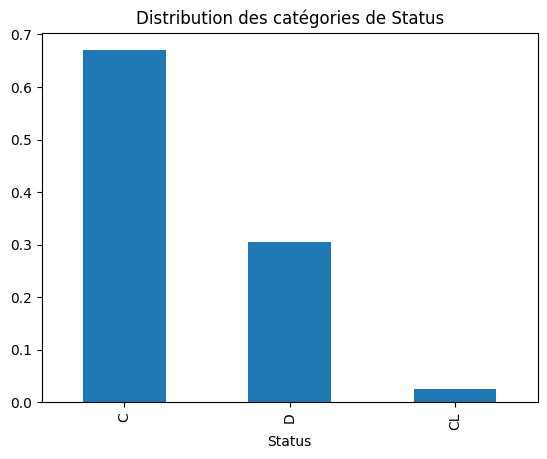

In [205]:
freq=train_df['Status'].value_counts(dropna=False, normalize=True)
freq.plot(kind='bar')
plt.title('Distribution des catégories de Status')
plt.show()

In [206]:
train_df.shape

(15000, 20)

In [ ]:
# enregistrer train_df traité dans un fichier afin de pouvoir l'utiliser plus tard
train_df.to_csv('train_df_clean.csv', index=False)


## <span style="color:blue">Analyse univariée</span>

### <span style="color:blue">Variables catégorielles</span>

* Affichage de toutes les vairables catégrielles :

/var/folders/74/x3782kls1rv6qscx40xcj5rm0000gn/T/ipykernel_15129/3371030689.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=train_df, palette='Set2')
/var/folders/74/x3782kls1rv6qscx40xcj5rm0000gn/T/ipykernel_15129/3371030689.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=train_df, palette='Set2')
/var/folders/74/x3782kls1rv6qscx40xcj5rm0000gn/T/ipykernel_15129/3371030689.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=train_df, palette='Set2')
/var/folders/74/x3782kls1rv6qscx40xcj5rm000

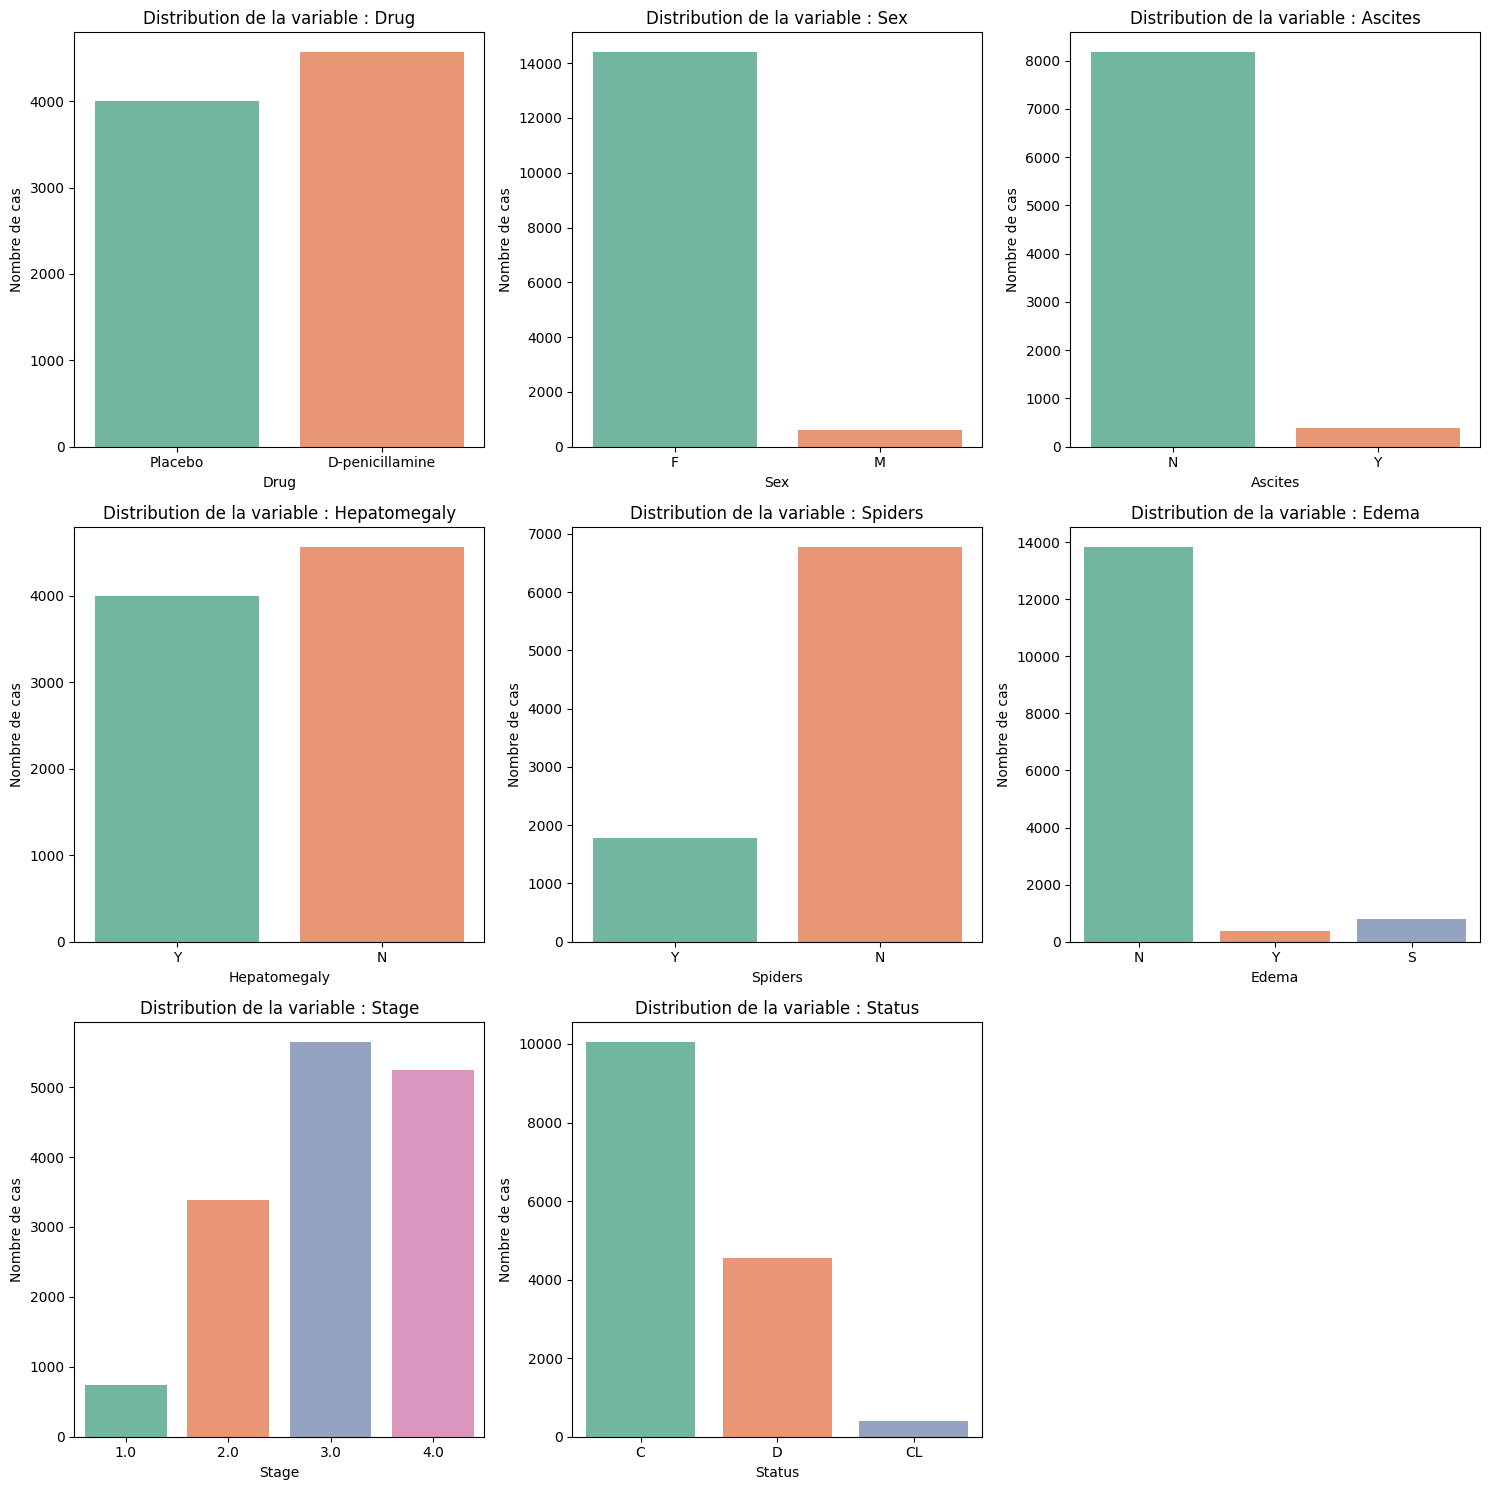

In [221]:
categorical_columns = train_df.select_dtypes(include=['object', 'category']).columns

n_cols = 3
n_rows = (len(categorical_columns) + n_cols - 1) // n_cols  # Calculer le nombre de lignes nécessaires

plt.figure(figsize=(n_cols * 5, n_rows * 5))  
for i, col in enumerate(categorical_columns):
    plt.subplot(n_rows, n_cols, i + 1)  
    sns.countplot(x=col, data=train_df, palette='Set2')  
    plt.title(f'Distribution de la variable : {col}')
    plt.xlabel(col)
    plt.ylabel('Nombre de cas')

plt.tight_layout() 
plt.show()


* Affichage de toutes les variables catégorielles en fonction de la variable cible :

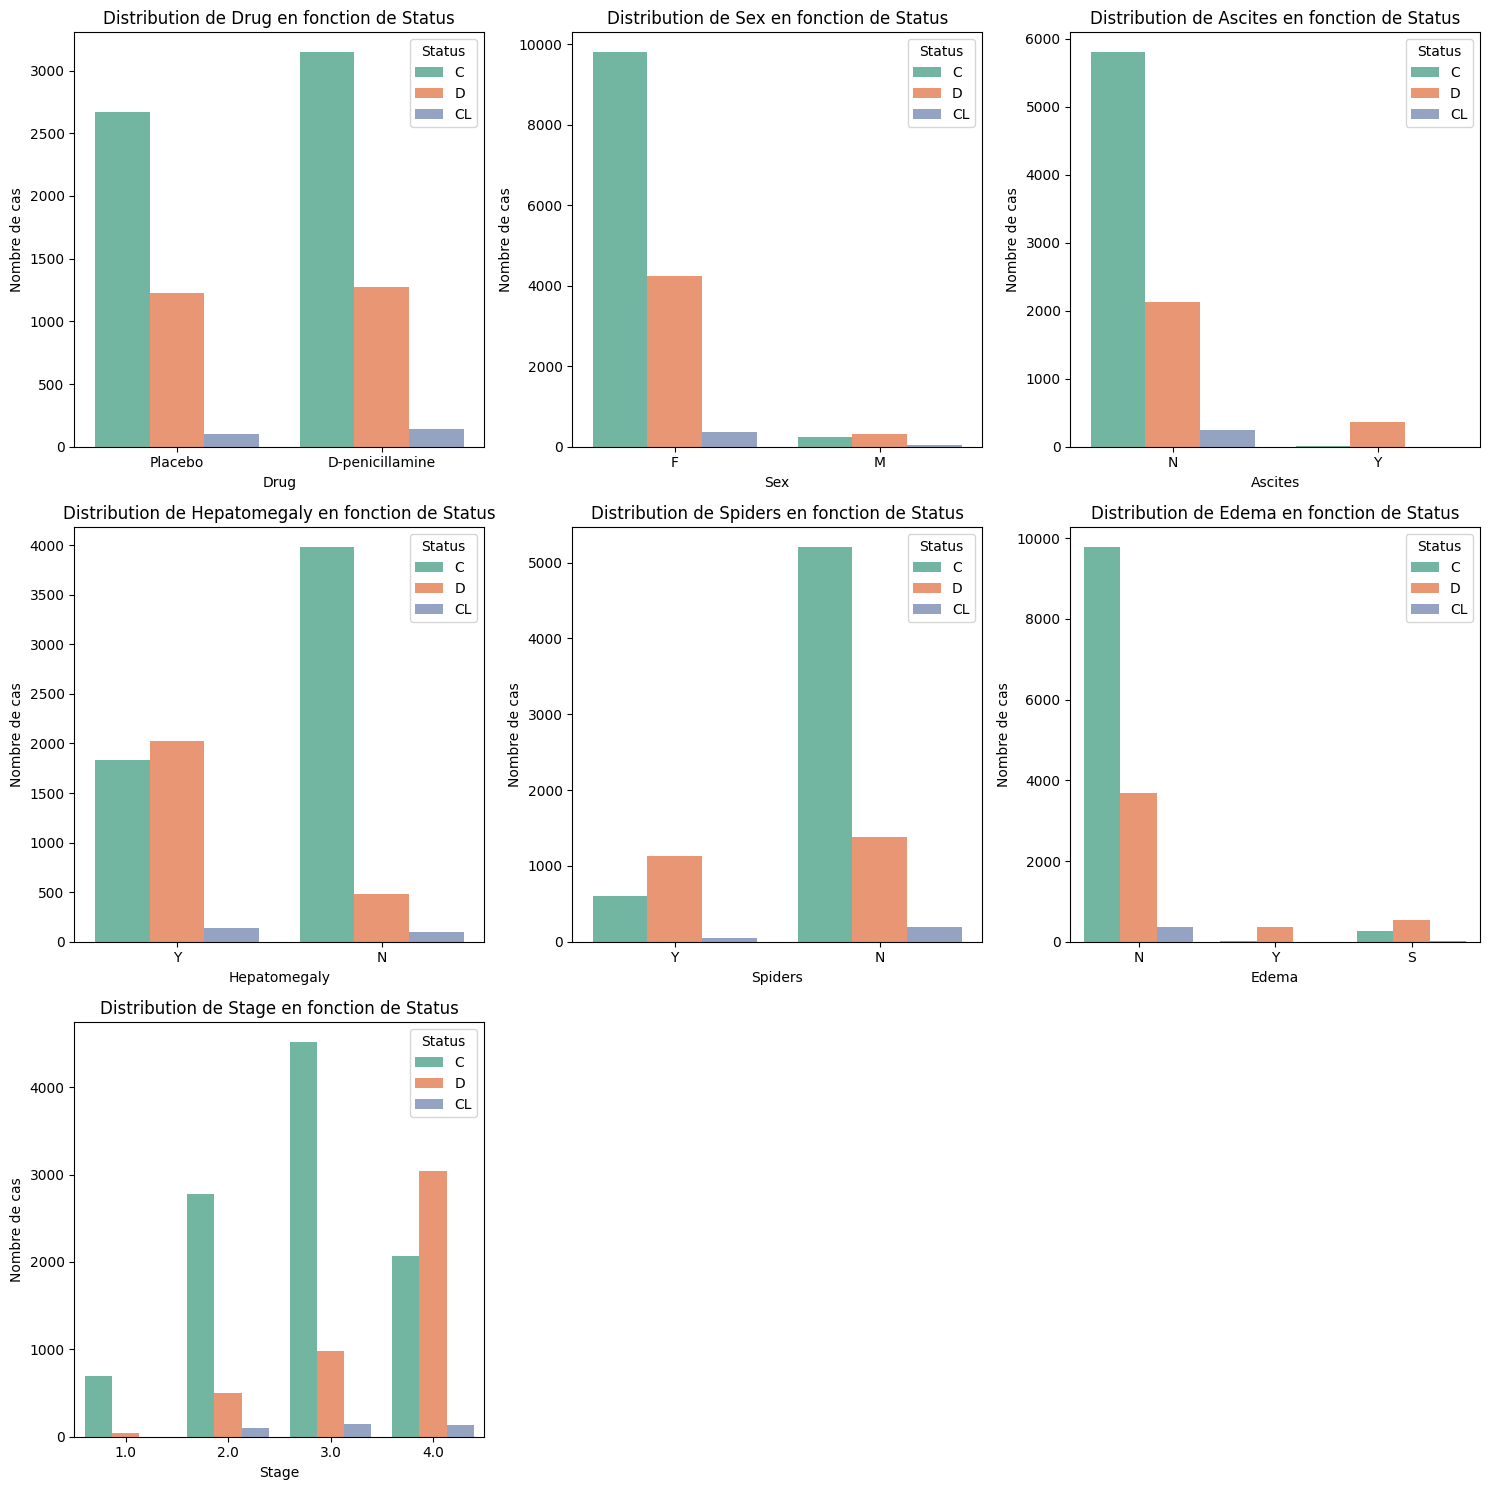

In [222]:
# Retirer la variable cible 'Status' de la liste des variables catégorielles
categorical_columns = categorical_columns[categorical_columns != 'Status']

n_cols = 3  # Nombre de colonnes par ligne
n_rows = (len(categorical_columns) + n_cols - 1) // n_cols  # Calculer le nombre de lignes nécessaires

plt.figure(figsize=(n_cols * 5, n_rows * 5))  

for i, col in enumerate(categorical_columns):
    plt.subplot(n_rows, n_cols, i + 1)  
    sns.countplot(x=col, hue='Status', data=train_df, palette='Set2')  
    plt.title(f'Distribution de {col} en fonction de Status')
    plt.xlabel(col)
    plt.ylabel('Nombre de cas')

plt.tight_layout()  
plt.show()


### <span style="color:blue">Variables continue</span>

* Affichage de toutes les variables :

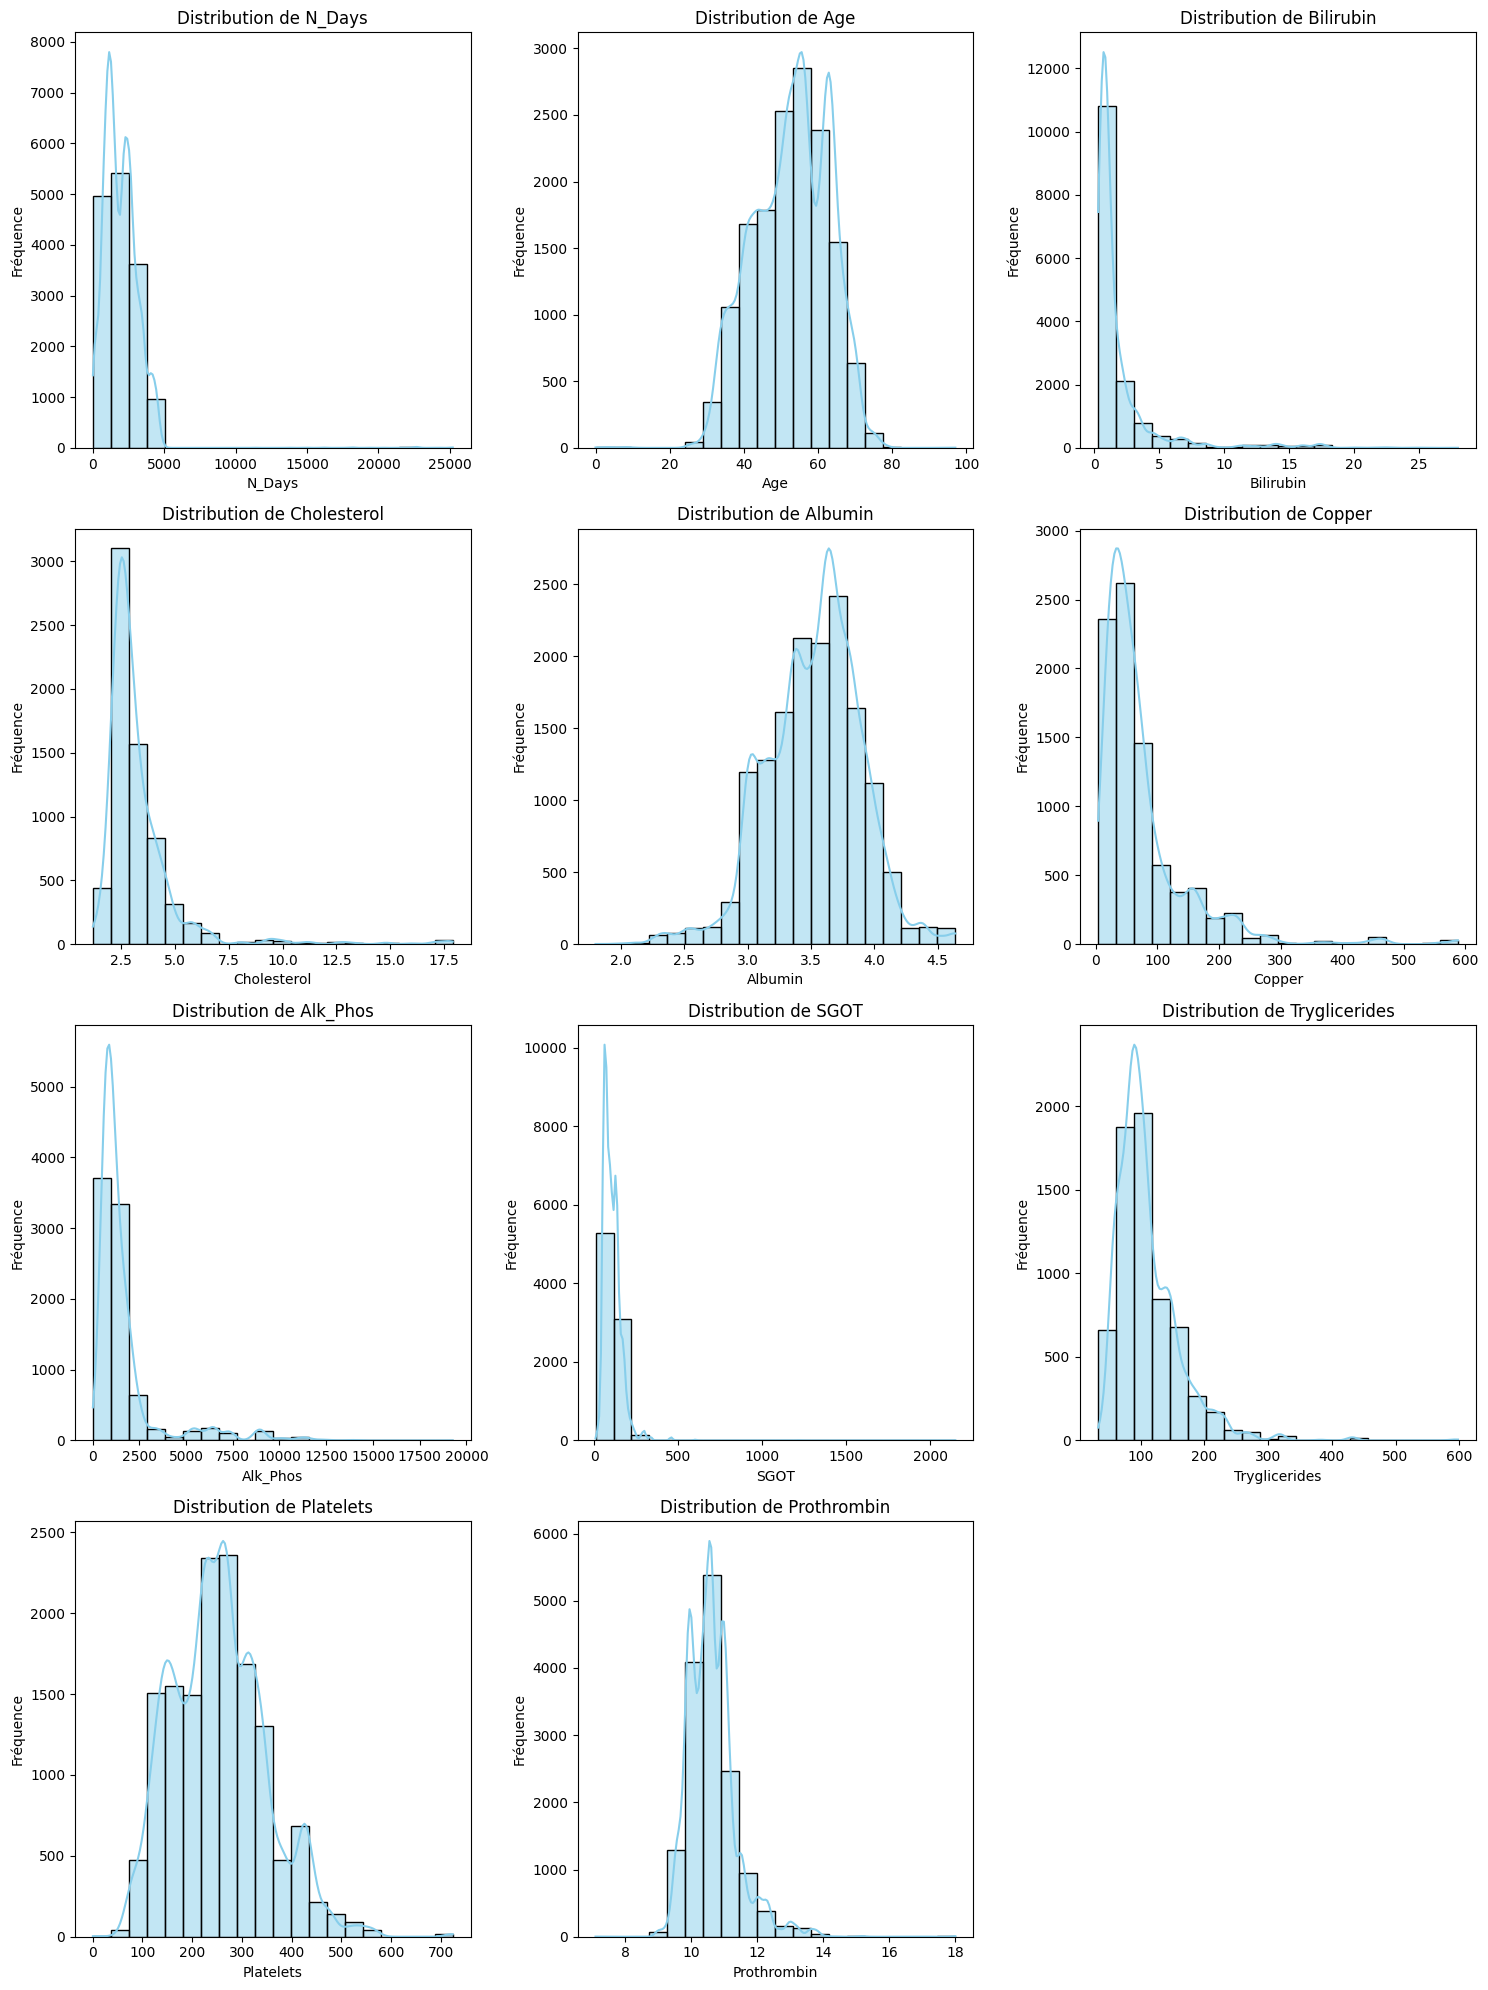

In [223]:
continuous_columns = train_df.select_dtypes(include=['float64', 'int64']).columns
continuous_columns = continuous_columns[continuous_columns != 'id']

n_cols = 3  # Nombre de colonnes par ligne
n_rows = (len(continuous_columns) + n_cols - 1) // n_cols  # Calculer le nombre de lignes nécessaires

plt.figure(figsize=(n_cols * 5, n_rows * 5)) 

for i, col in enumerate(continuous_columns):
    plt.subplot(n_rows, n_cols, i + 1)  
    sns.histplot(train_df[col], kde=True, color='skyblue', bins=20)  
    plt.title(f'Distribution de {col}')
    plt.xlabel(col)
    plt.ylabel('Fréquence')

plt.tight_layout()  
plt.show()


* Affichage de toutes les variables continues en fonction de la variable cible 

In [224]:
var_continues = list(train_df.select_dtypes(include=["int","float"]).columns)

In [225]:
def plot_var_continues(var_continues, train_df, hue_var="Status"):
    # Définir la taille de la figure principale
    num_vars = len(var_continues)  # Nombre de variables
    rows = (num_vars // 3) + (num_vars % 3 > 0)  # Calculer le nombre de lignes (3 colonnes par défaut)
    plt.figure(figsize=(21, 7 * rows))  # Taille ajustée en fonction des lignes
    
    for i, var in enumerate(var_continues[:-1], start=1):  # Commence à 1 pour l'index des sous-graphiques
        plt.subplot(rows, 3, i)
        
        # Tracer le kdeplot
        sns.kdeplot(
            data=train_df, 
            x=var, 
            hue=hue_var, 
            fill=True, 
            palette="Purples", 
            common_norm=True
        )
        sns.despine(top=True, right=True, bottom=True, left=True)  # Supprime les cadres inutiles
        plt.tick_params(axis="both", which="both", bottom=False, top=False, left=False)
        plt.xlabel("")  # Supprimer les labels des x
        plt.title(var, fontsize=14)  # Ajouter un titre pour chaque graphique
    
    # Afficher tous les graphiques ensemble
    plt.tight_layout()
    plt.show()


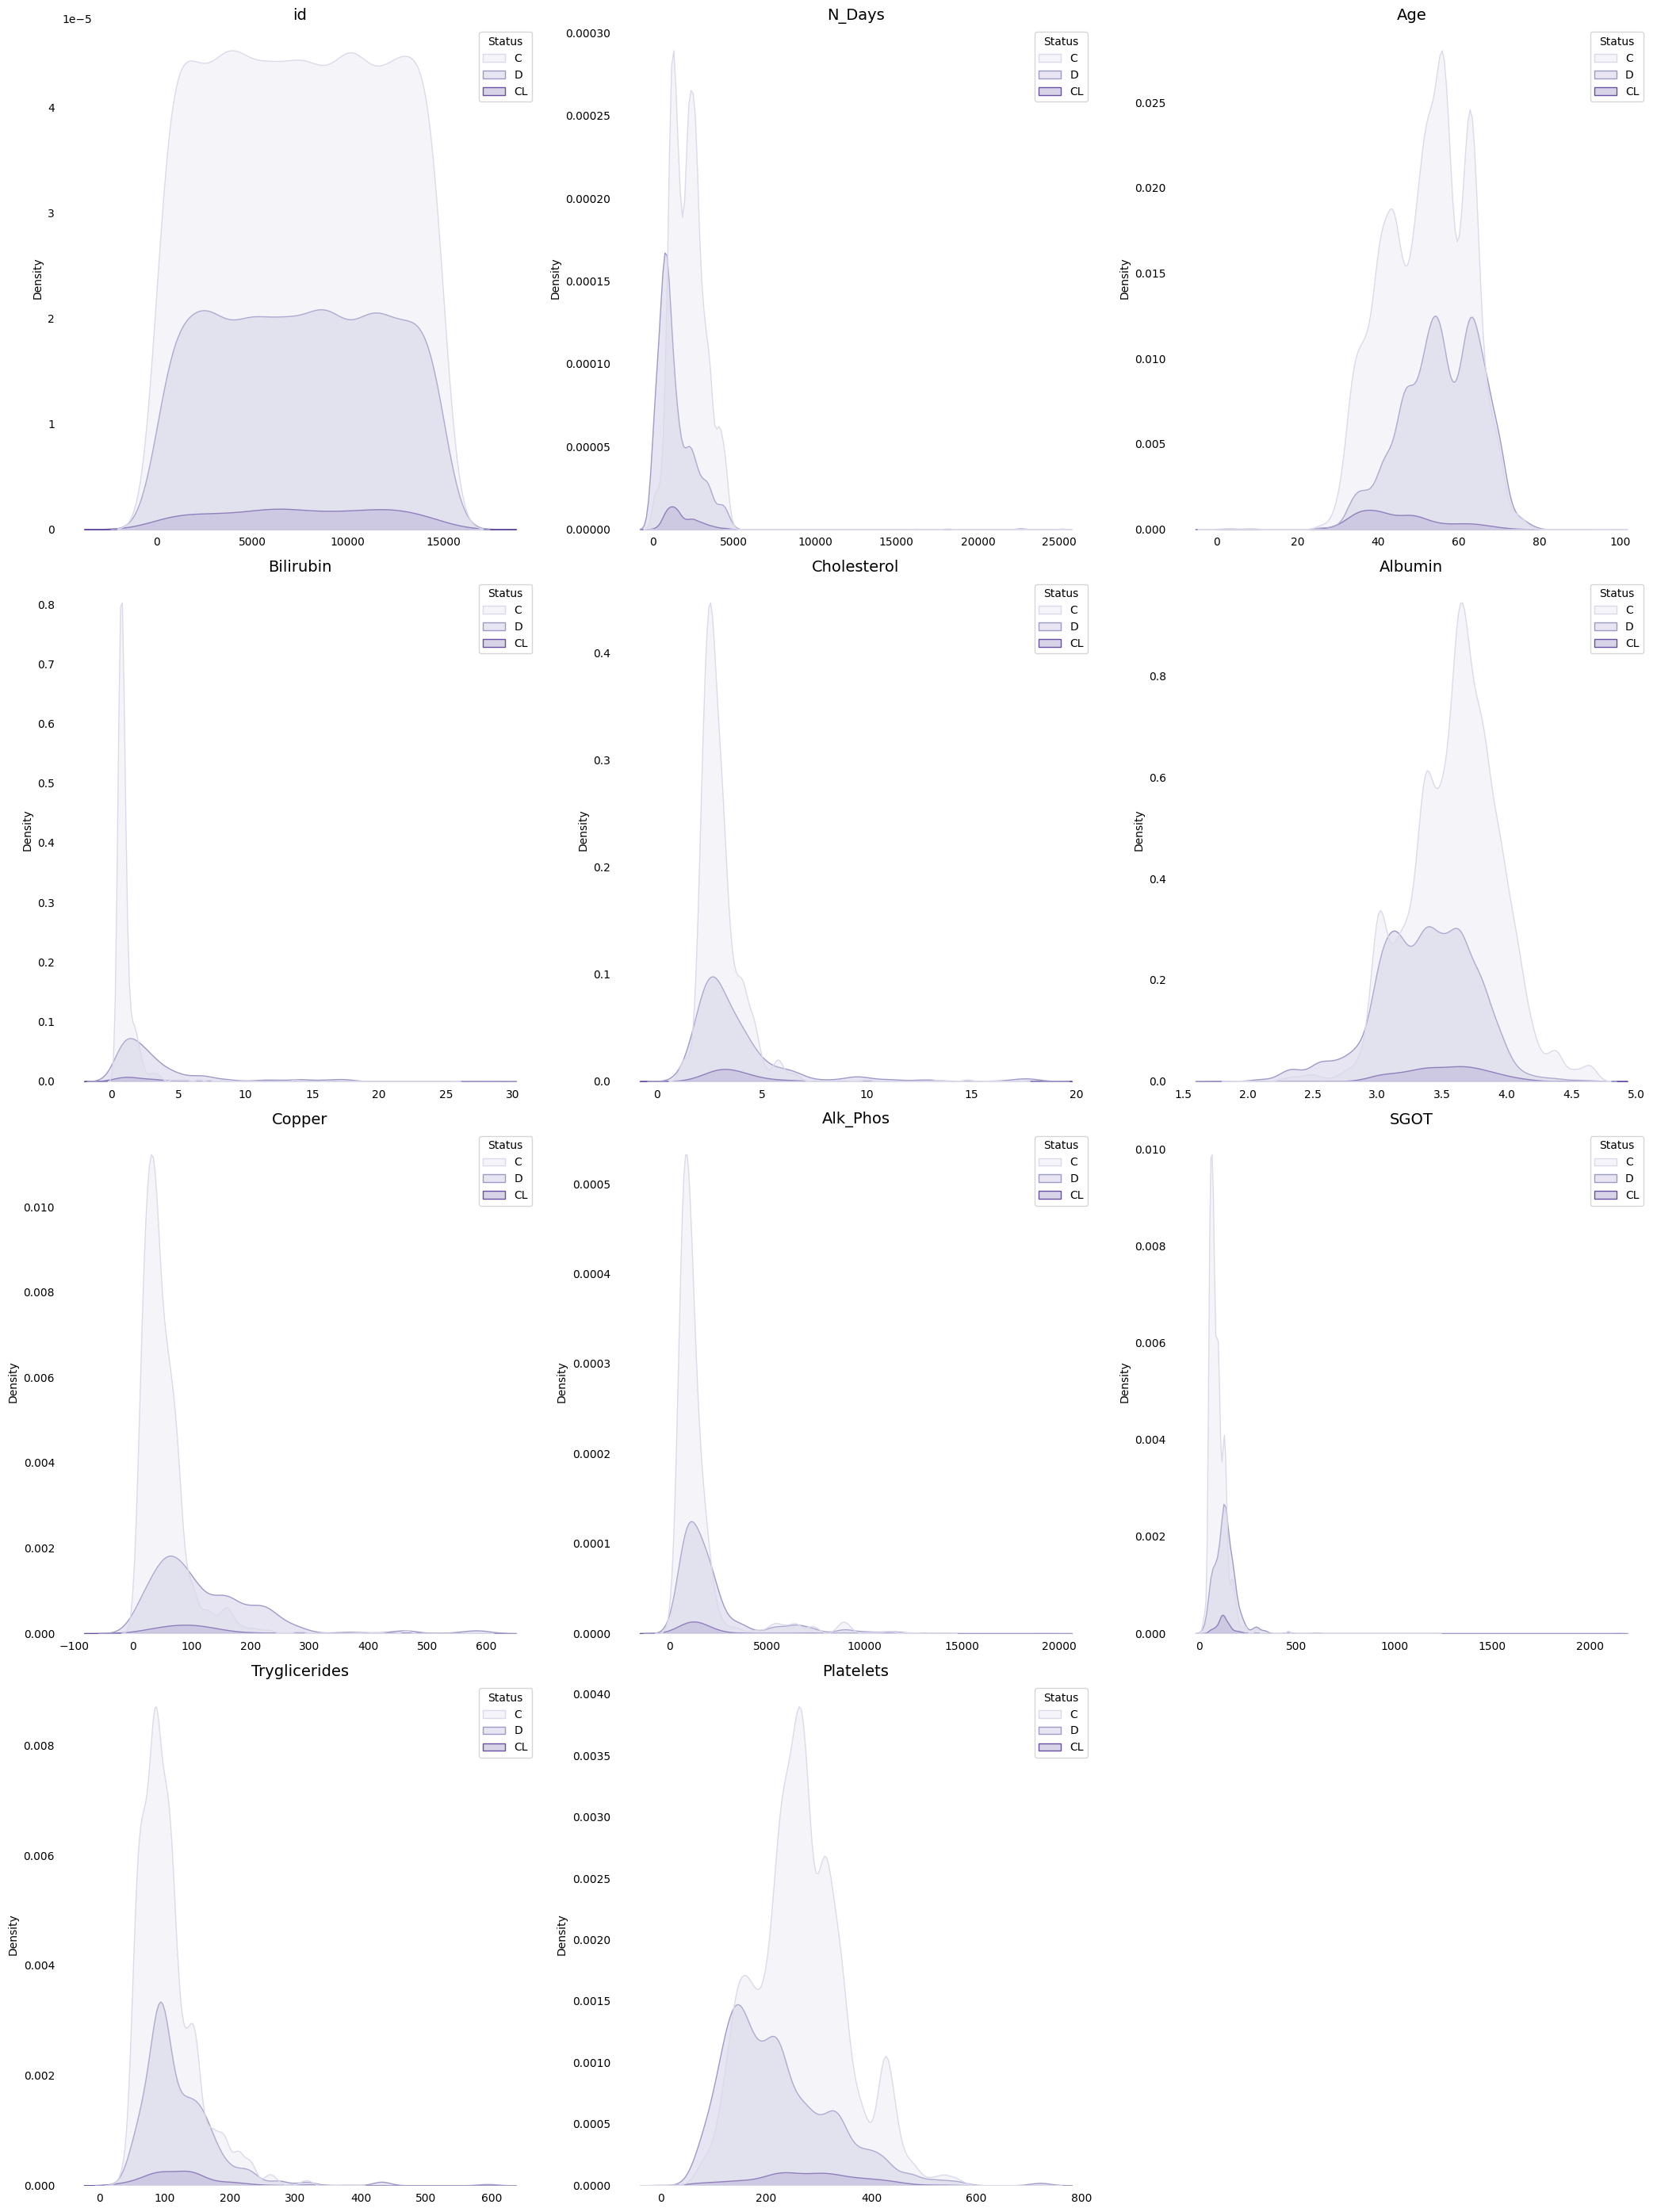

In [226]:
plot_var_continues(var_continues, train_df, hue_var="Status")

* Affichage des boxplots de toutes les variables continues :

/var/folders/74/x3782kls1rv6qscx40xcj5rm0000gn/T/ipykernel_15129/350439153.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=train_df[col], palette='Set2')
/var/folders/74/x3782kls1rv6qscx40xcj5rm0000gn/T/ipykernel_15129/350439153.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=train_df[col], palette='Set2')
/var/folders/74/x3782kls1rv6qscx40xcj5rm0000gn/T/ipykernel_15129/350439153.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=train_df[col], palette='Set2')
/var/folders/74/x3782kls1rv6qscx40xcj5rm0000gn/T/ipykernel_15129/35

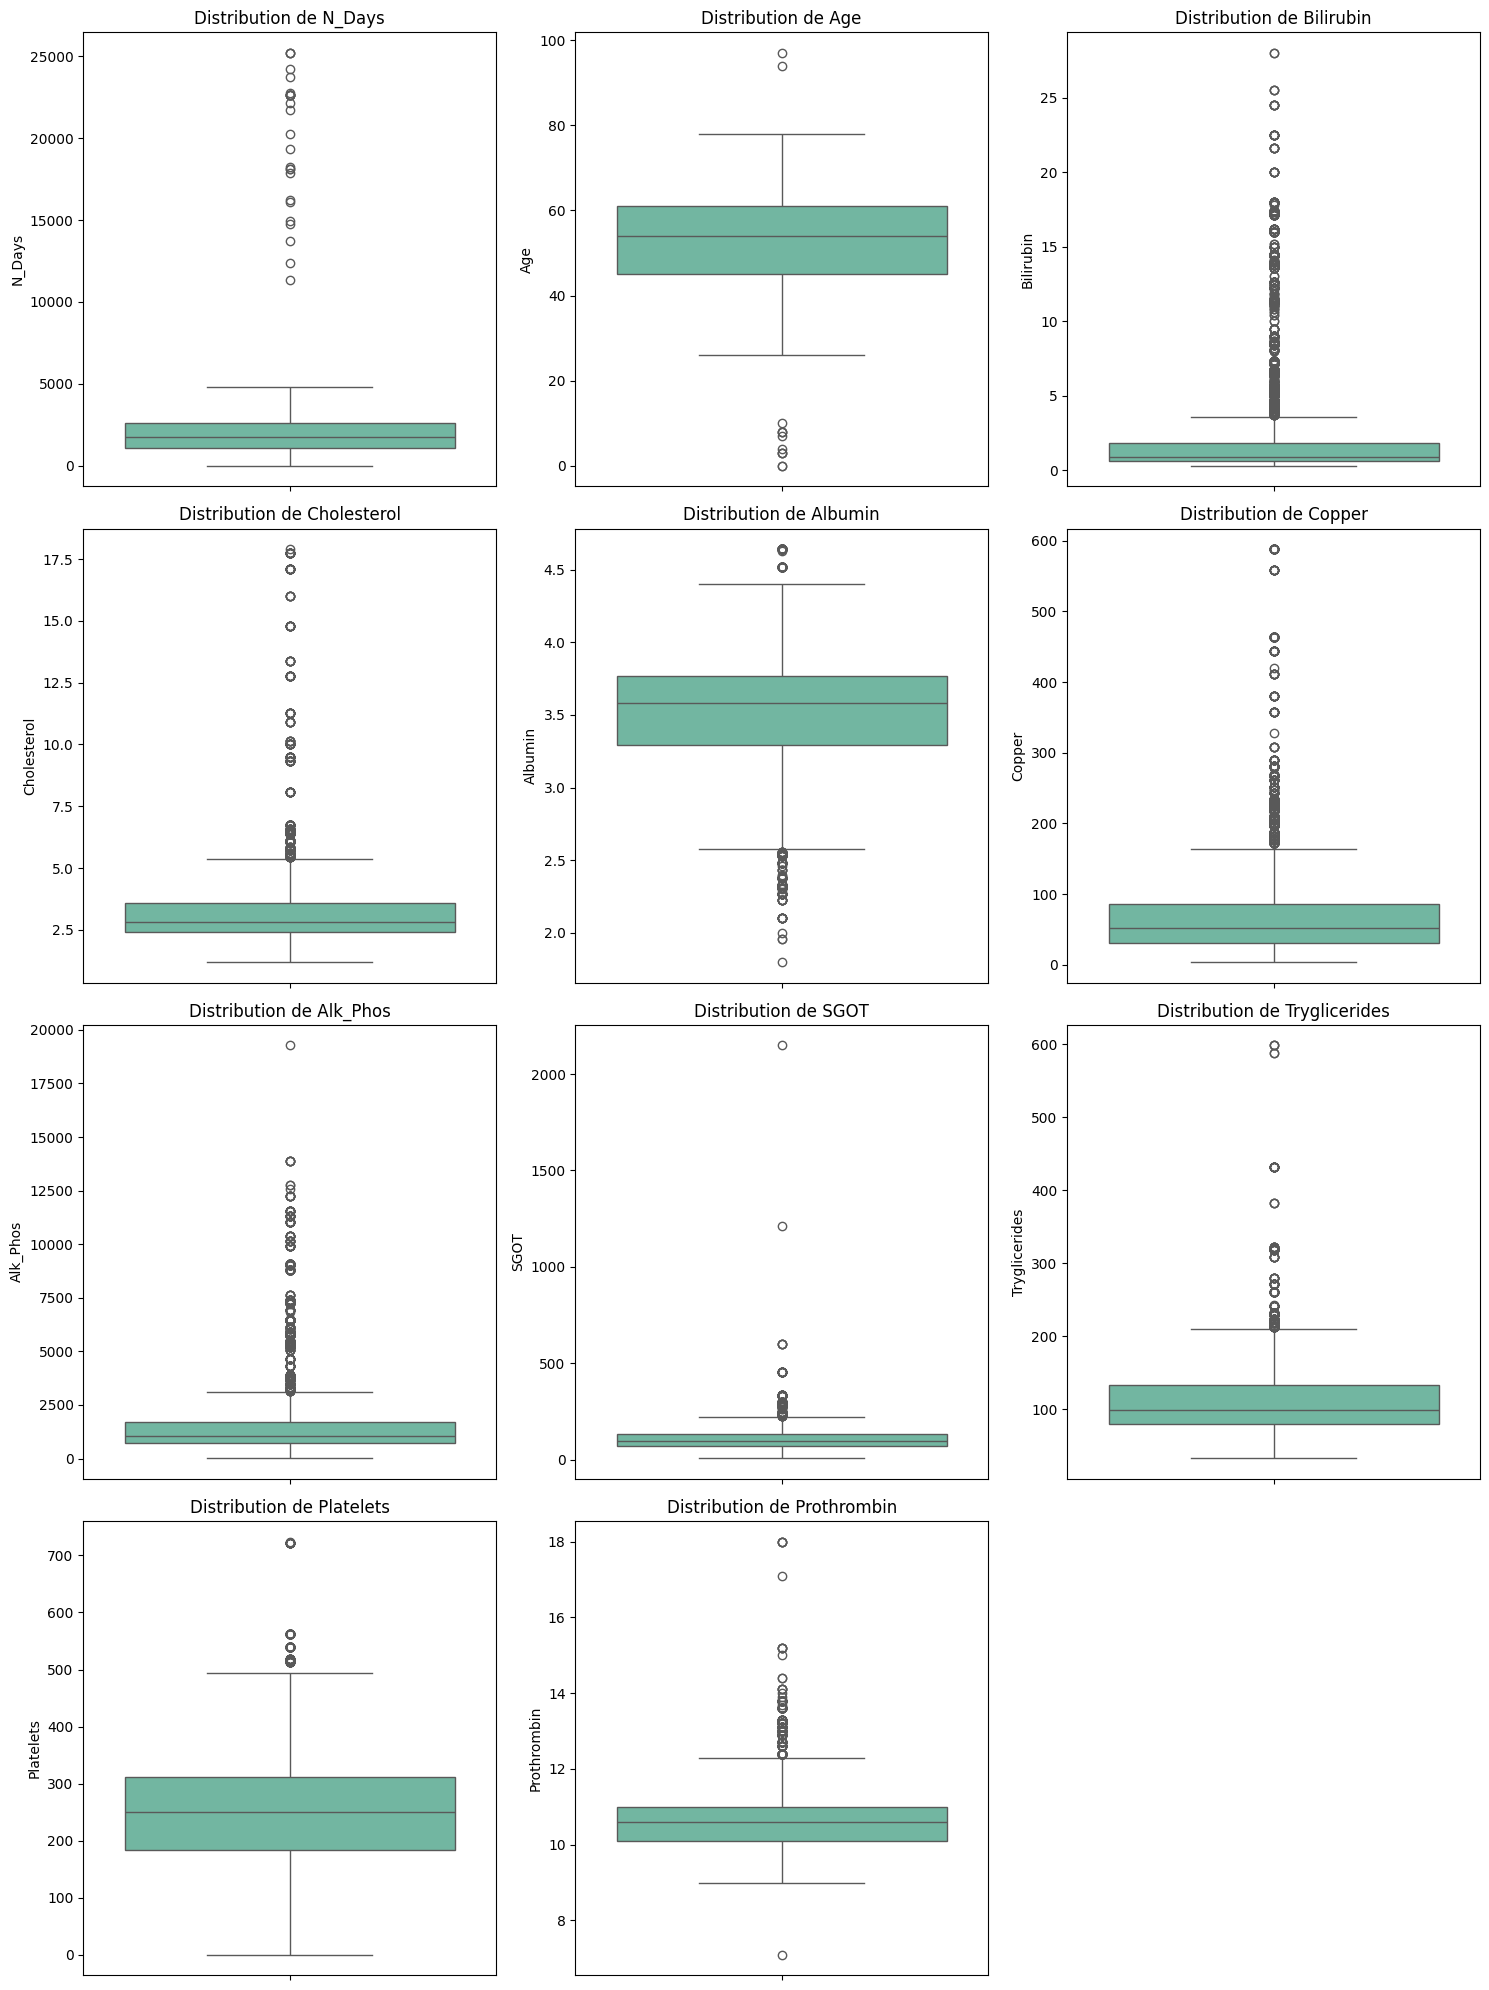

In [227]:
n_cols = 3
n_rows = (len(continuous_columns) + n_cols - 1) // n_cols

plt.figure(figsize=(n_cols * 5, n_rows * 5))

for i, col in enumerate(continuous_columns):
    plt.subplot(n_rows, n_cols, i + 1) 
    sns.boxplot(y=train_df[col], palette='Set2')  
    plt.title(f'Distribution de {col}')
    plt.ylabel(col)

plt.tight_layout()

plt.show()


* Affichage des boxplots de toutes les variables continues en fonction de la variable cible :

/var/folders/74/x3782kls1rv6qscx40xcj5rm0000gn/T/ipykernel_15129/4161465305.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Status', y=col, data=train_df, palette='Set2')
/var/folders/74/x3782kls1rv6qscx40xcj5rm0000gn/T/ipykernel_15129/4161465305.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Status', y=col, data=train_df, palette='Set2')
/var/folders/74/x3782kls1rv6qscx40xcj5rm0000gn/T/ipykernel_15129/4161465305.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Status', y=col, data=train_df, palette='Set2')
/var/folders/

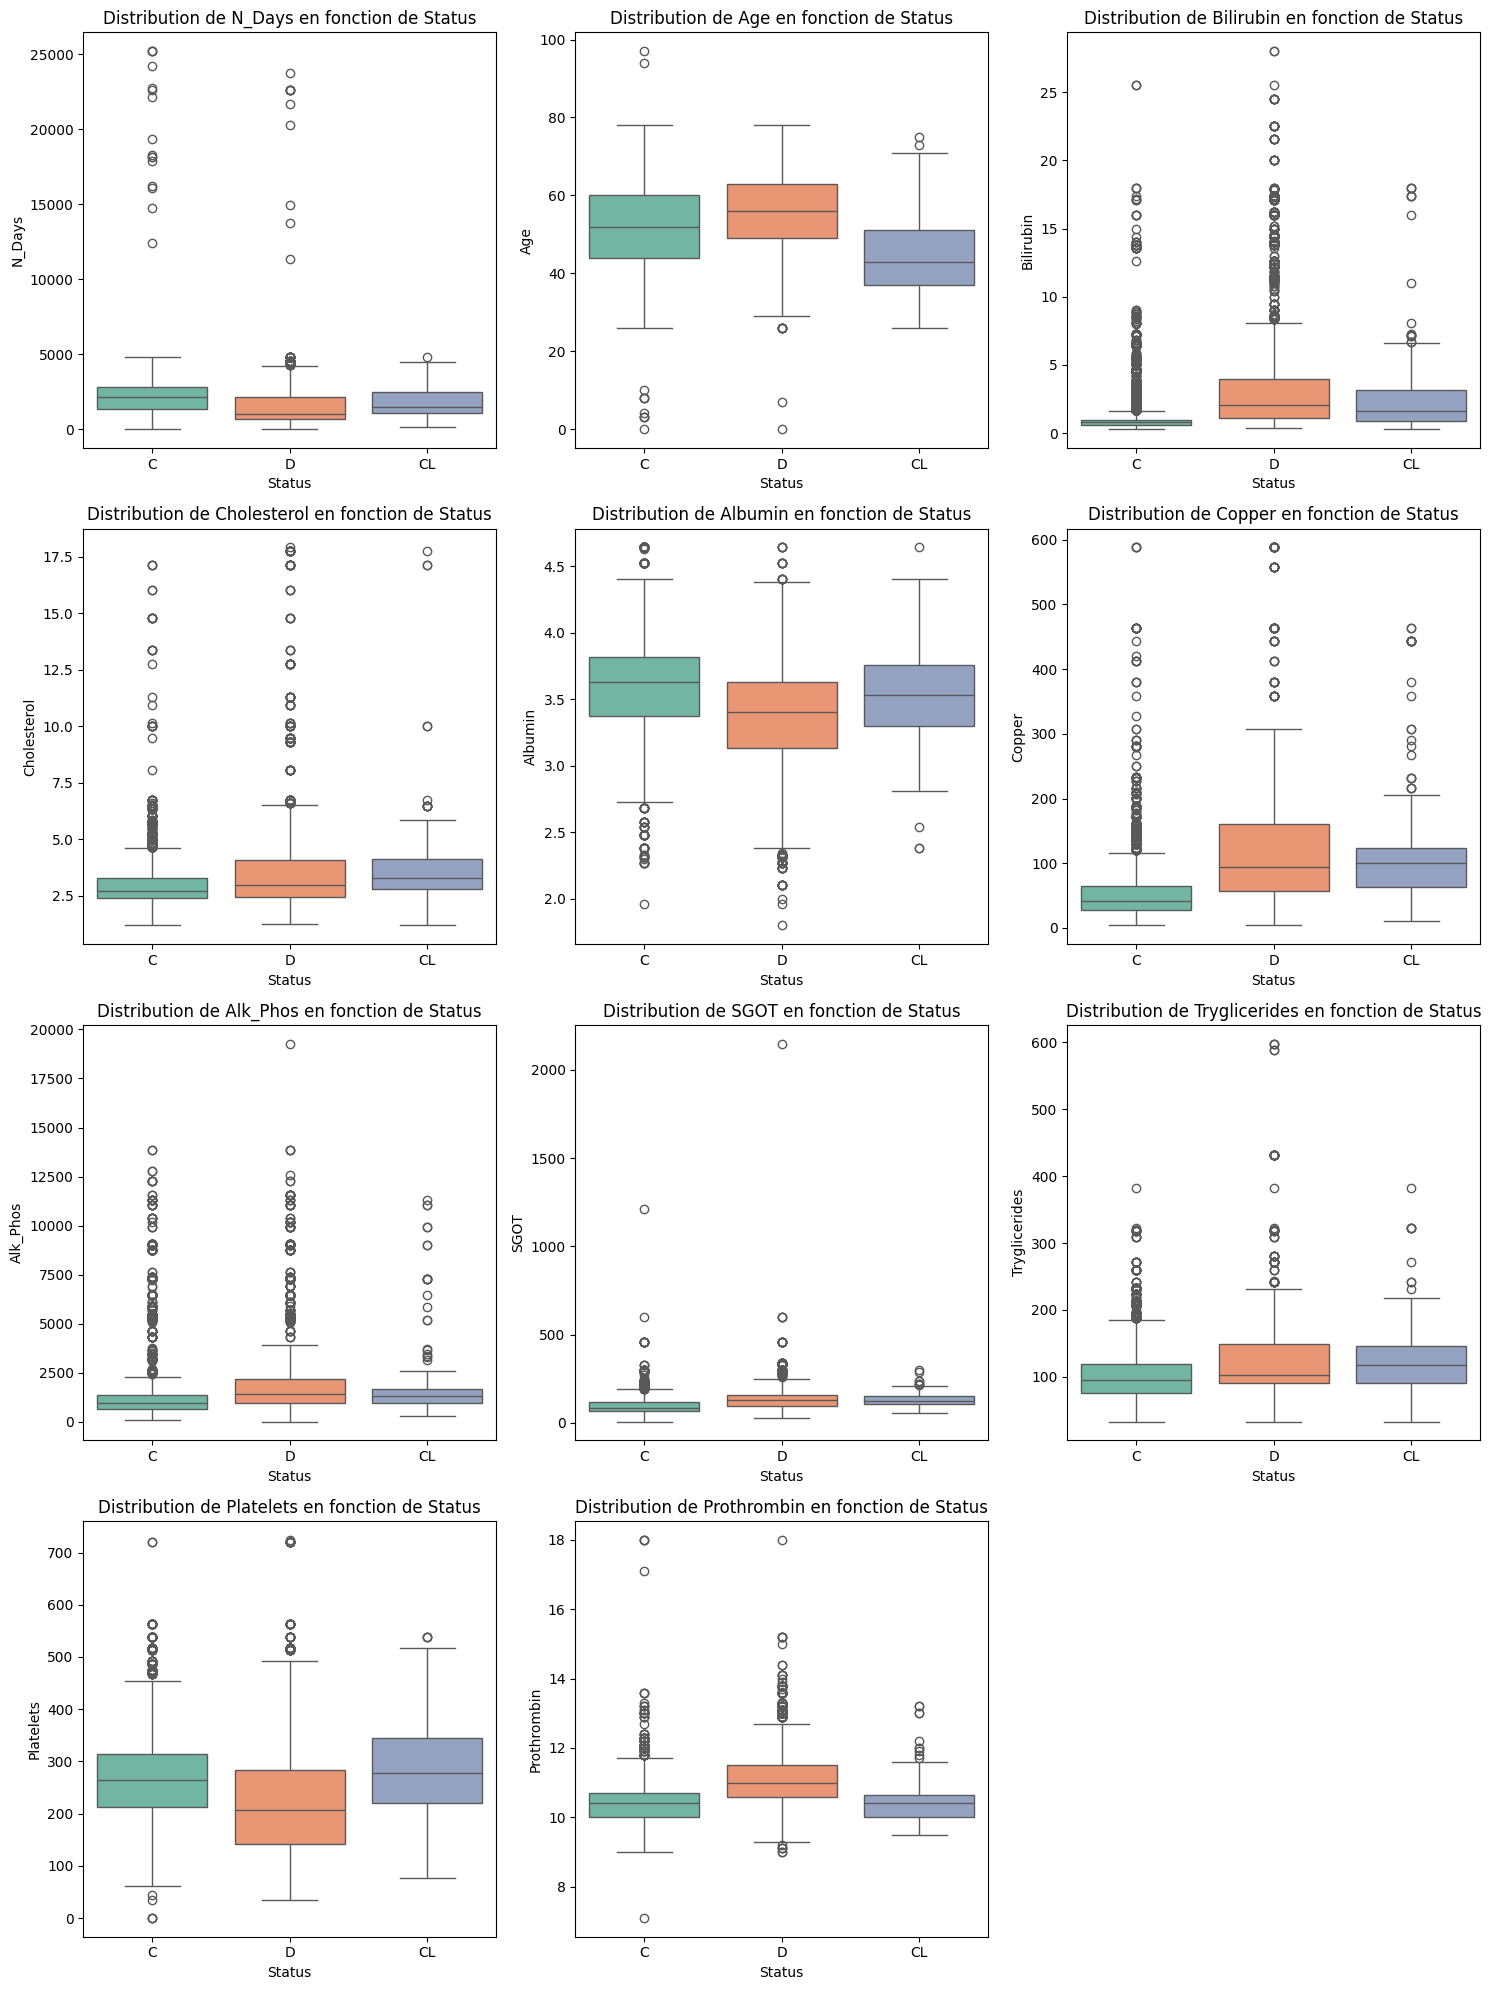

In [228]:
n_cols = 3  # Nombre de colonnes par ligne
n_rows = (len(continuous_columns) + n_cols - 1) // n_cols  # Calculer le nombre de lignes nécessaires

plt.figure(figsize=(n_cols * 5, n_rows * 5))  

for i, col in enumerate(continuous_columns):
    plt.subplot(n_rows, n_cols, i + 1)  
    sns.boxplot(x='Status', y=col, data=train_df, palette='Set2') 
    plt.title(f'Distribution de {col} en fonction de Status')
    plt.xlabel('Status')
    plt.ylabel(col)

plt.tight_layout()  
plt.show()


## <span style="color:blue">Analyse multivariée</span>

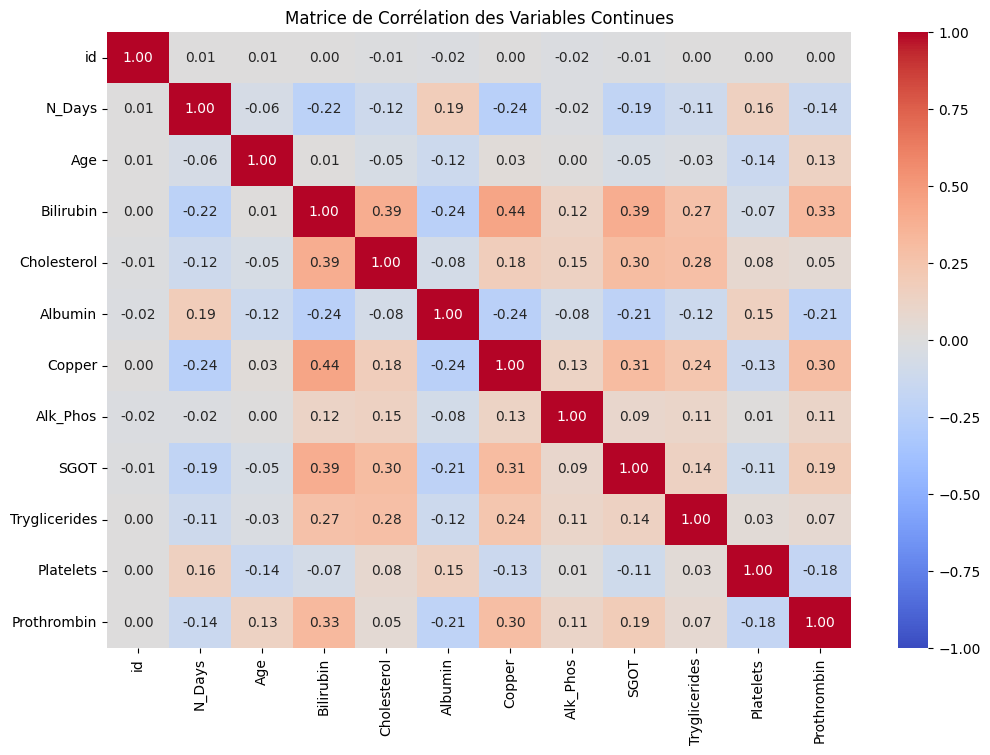

In [ ]:
# Matrice de corrélation (variables continues)
corr_matrix = train_df[continuous_columns].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, vmin=-1, vmax=1)
plt.title('Matrice de Corrélation des Variables Continues')
plt.show()


In [233]:
# Test du chi-carré (Pour vérifier si deux variables catégorielles sont indépendantes)
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(train_df['Drug'], train_df['Status'])
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

print(f"Statistique du chi-carré : {chi2_stat}")
print(f"Valeur p : {p_val}")


Statistique du chi-carré : 10.398610569958167
Valeur p : 0.005520398192462929


In [235]:
# Corrélation entre les variables catégorielles après encodage
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
train_df['Drug_encoded'] = encoder.fit_transform(train_df['Drug'])
train_df['Status_encoded'] = encoder.fit_transform(train_df['Status'])

corr_matrix_categorical = train_df[['Drug_encoded', 'Status_encoded']].corr()

print(corr_matrix_categorical)


                Drug_encoded  Status_encoded
Drug_encoded        1.000000        0.032666
Status_encoded      0.032666        1.000000


In [237]:
# Tableau de contingence des variables catégorielles en fonction de la variable cible 

for col in categorical_columns:
    if col != 'Status':  # Ignorer la variable cible elle-même
        contingency_table = pd.crosstab(train_df[col], train_df['Status'])
        print(f"Tableau de contingence pour {col} et Status :")
        print(contingency_table)
        print("\n" + "-"*50 + "\n")

Tableau de contingence pour Drug et Status :
Status              C   CL     D
Drug                            
D-penicillamine  3147  144  1277
Placebo          2672   98  1226

--------------------------------------------------

Tableau de contingence pour Sex et Status :
Status     C   CL     D
Sex                    
F       9803  360  4240
M        246   31   320

--------------------------------------------------

Tableau de contingence pour Ascites et Status :
Status      C   CL     D
Ascites                 
N        5803  243  2132
Y          16    0   367

--------------------------------------------------

Tableau de contingence pour Hepatomegaly et Status :
Status           C   CL     D
Hepatomegaly                 
N             3981  103   480
Y             1834  140  2025

--------------------------------------------------

Tableau de contingence pour Spiders et Status :
Status      C   CL     D
Spiders                 
N        5205  192  1376
Y         608   50  1124

-

## <span style="color:blue">Visualisation des relations</span>